# **1. Khai báo và cài đặt cần sử dụng**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from datetime import datetime
import warnings

In [5]:
from pylab import rcParams

rcParams['figure.figsize'] = 16,9

### **Đọc dữ liệu**

In [6]:
# from google.colab import drive
# drive.mount('data')

In [7]:
df = pd.read_csv('data/newProcessed22.csv')

In [8]:
df

,Index,Domain,Domain_Length,Subdomain_Level,Url_Length,Url_Depth,Have_At_Sign,Have_Tilde_Symbol,No_Https,Having_IP,...,DNS,Domain_Age,Domain_End,Rank_Host,Rank_Country,Iframe,Mouse_Over,Right_Click,Forwarding,Label
0,0,google.com,10,1,43,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,1,google.com,10,1,36,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
2,2,google.com,10,1,41,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
3,3,bilnet.eu,9,1,16,0,0,0,1,0,...,0,1,1,1,1,0,0,0,1,0
4,4,bil-privatebanking.eu,21,1,28,0,0,0,1,0,...,0,1,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13041,13041,formbuddy.com,13,1,56,2,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
13042,13042,formbuddy.com,13,1,61,2,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
13043,13043,habbocreditosparati.blogspot.com,32,1,44,0,0,0,1,0,...,1,1,1,1,1,0,0,0,0,1
13044,13044,creditiperhabbogratissicuro100.blogspot.com,43,1,95,3,0,0,1,0,...,1,1,1,1,1,0,0,0,0,1


**Kiểm tra độ quan trọng của đăc trưng (feature important)**

In [9]:
df.columns

Index(['Index', 'Domain', 'Domain_Length', 'Subdomain_Level', 'Url_Length',
       'Url_Depth', 'Have_At_Sign', 'Have_Tilde_Symbol', 'No_Https',
       'Having_IP', 'Domain_In_Subdomains', 'Domain_In_Paths',
       'Http_In_Hostname', 'Double_Slash_In_Path', 'Num_Dots',
       'Num_Dashes_In_Hostname', 'Num_Underscore', 'Num_Percent',
       'Num_Query_Components', 'Num_Ampersand', 'Num_Hash',
       'Num_Numeric_Chars', 'Path_Length', 'Query_Length',
       'Num_Sensitive_Words', 'Ext_Favicon', 'Redirection', 'Tiny_URL',
       'Prefix_Suffix', 'DNS', 'Domain_Age', 'Domain_End', 'Rank_Host',
       'Rank_Country', 'Iframe', 'Mouse_Over', 'Right_Click', 'Forwarding',
       'Label'],
      dtype='object')

In [10]:
features = ['Domain_Length', 'Subdomain_Level', 'Have_At_Sign', 'Have_Tilde_Symbol', 'No_Https', 'Having_IP', 'Domain_In_Subdomains', 'Domain_In_Paths', 'Http_In_Hostname', 'Double_Slash_In_Path', 'Num_Dots', 'Num_Dashes_In_Hostname', 'Num_Underscore', 'Num_Percent', 'Num_Query_Components', 'Num_Ampersand', 'Num_Hash', 'Num_Numeric_Chars', 'Path_Length', 'Query_Length', 'Num_Sensitive_Words', 'Ext_Favicon', 'Redirection', 'Tiny_URL', 'Prefix_Suffix', 'DNS', 'Domain_Age', 'Domain_End', 'Rank_Host', 'Rank_Country', 'Iframe', 'Mouse_Over', 'Right_Click', 'Forwarding']

In [63]:
X = df[features]
y = df['Label']

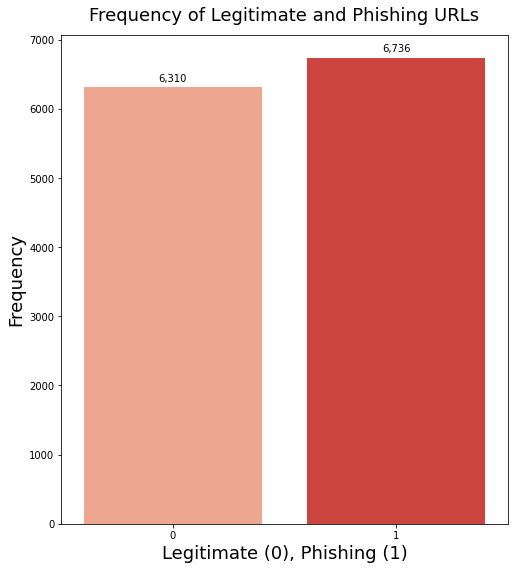

In [93]:
plt.figure(figsize = (8, 9))        
bar = sns.countplot(x=df["Label"], 
              data=df, 
              palette="Reds")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 18, pad = 14)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 18)
plt.ylabel("Frequency",fontsize = 18)
plt.show();

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostClassifier
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
rf.feature_importances_

array([2.34816755e-01, 0.00000000e+00, 1.38379810e-02, 1.05702141e-03,
       3.33949115e-02, 2.28891520e-04, 2.82533783e-02, 6.46226640e-04,
       5.24837824e-06, 8.15026280e-04, 6.19364371e-02, 3.20677596e-02,
       1.59724876e-02, 5.30725184e-03, 6.34978317e-03, 5.37983100e-03,
       5.94383270e-03, 8.63534466e-02, 1.84676185e-01, 8.52461375e-02,
       1.60910051e-02, 0.00000000e+00, 5.14808059e-03, 1.78984057e-02,
       2.35519822e-02, 8.88850190e-03, 2.83457595e-02, 3.44644736e-02,
       1.92113032e-02, 6.75982598e-03, 9.57986716e-03, 6.67810642e-03,
       9.64095981e-03, 1.14531374e-02])

<BarContainer object of 34 artists>

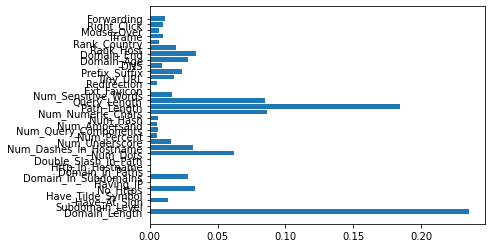

In [15]:
plt.barh(features, rf.feature_importances_)

# **2. Huấn luyện mô hình - Classification**

**Split dataset**

In [16]:
Y = y

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
print('Kích thước tập huấn luyện: ', X_train.shape, y_train.shape)
print('Kích thước tập kiểm tra: ', X_test.shape, y_test.shape)

Kích thước tập huấn luyện:  (10436, 34) (10436,)
Kích thước tập kiểm tra:  (2610, 34) (2610,)


In [112]:
# Hàm tính độ chính xác, ma trận nhầm lẫn, Recall, precision, f1 score và vẽ đồ thị ROC
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X_test, y_test, y_prediction):
    print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
    #Accuracy
    print("1. Accuracy:",metrics.accuracy_score(y_prediction,y_test))
    # confusion_matrix
    print('2. confusion_matrix:')
    matrix = confusion_matrix(y_prediction,y_test)
    print(matrix)
    df_cm = pd.DataFrame(matrix, index = [i for i in "01"], columns = [i for i in "01"])
    plt.figure(figsize = (13,10))
    sns.set(font_scale=3)
    s = sns.heatmap(df_cm, annot=True, vmax=1200, fmt="d")
    s.set(xlabel='Predictions', ylabel='Actuals')
    # recall_score
    print('3. recall_score: ', recall_score(y_prediction,y_test))
    # precision_score
    print('4. precision_score: ', precision_score(y_prediction,y_test))
    # f1_score
    print('5. f1_score: ', f1_score(y_prediction,y_test))
    # ROC plot
    print('6. Biểu đồ ROC của mô hình:')
    metrics.plot_roc_curve(model, X_test, y_test)
    plt.show()

In [21]:
#computing the accuracy, f1_score, Recall, precision of the model performance
def show_result(model_name, y_train_model, y_test_model):
    acc_train_model = metrics.accuracy_score(y_train,y_train_model)
    acc_test_model = metrics.accuracy_score(y_test,y_test_model)
    print(model_name + " : Accuracy on training Data: {:.3f}".format(acc_train_model))
    print(model_name + " : Accuracy on test Data: {:.3f}".format(acc_test_model))
    print()

    f1_score_train_model = metrics.f1_score(y_train,y_train_model)
    f1_score_test_model = metrics.f1_score(y_test,y_test_model)
    print(model_name + " : f1_score on training Data: {:.3f}".format(f1_score_train_model))
    print(model_name + " : f1_score on test Data: {:.3f}".format(f1_score_test_model))
    print()

    recall_score_train_model = metrics.recall_score(y_train,y_train_model)
    recall_score_test_model = metrics.recall_score(y_test,y_test_model)
    print(model_name + " : Recall on training Data: {:.3f}".format(recall_score_train_model))
    print(model_name + " : Recall on test Data: {:.3f}".format(recall_score_test_model))
    print()

    precision_score_train_model = metrics.precision_score(y_train,y_train_model)
    precision_score_test_model = metrics.precision_score(y_test,y_test_model)
    print(model_name + " : precision on training Data: {:.3f}".format(precision_score_train_model))
    print(model_name + " : precision on test Data: {:.3f}".format(precision_score_test_model))

    #computing the classification report of the model

    print(metrics.classification_report(y_test, y_test_model))

In [22]:
def re_training(modelClassifier, param='max_depth', min = 1, max = 10, option=1):
    training_accuracy = []
    test_accuracy = []
    test_recall = []
    test_precision = []
    test_f1_score = []
    # try max_depth from 1 to 20
    for n in range(min,max):
        if param == 'random_state' :
            model_test =  modelClassifier(random_state=n*option)
        elif param == 'n_estimators':
            model_test =  modelClassifier(n_estimators=n*option)
        elif param == 'learning_rate':
            model_test =  modelClassifier(learning_rate=n*option)
        elif param == 'max_depth':
            model_test =  modelClassifier(max_depth=n*option)
        elif param == 'num_trees':
            model_test =  modelClassifier(num_trees=n*option)

        model_test.fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(model_test.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(model_test.score(X_test, y_test))
        test_recall.append(metrics.recall_score(y_test,model_test.predict(X_test)))
        test_precision.append(metrics.precision_score(y_test,model_test.predict(X_test)))
        test_f1_score.append(metrics.f1_score(y_test,model_test.predict(X_test)))

    #plotting the training & testing accuracy for n_estimators from 1 to 20
    plt.figure(figsize=None)
    plt.plot(range(min,max), training_accuracy, label="training accuracy")
    plt.plot(range(min,max), test_accuracy, label="test accuracy")
    plt.plot(range(min,max), test_recall, label="test recall")
    plt.plot(range(min,max), test_precision, label="test precision")
    plt.plot(range(min,max), test_f1_score, label="test f1_score")
    plt.ylabel("Accuracy")  
    plt.xlabel(param)
    plt.legend();

**Logistic Regression**

In [23]:
# #Given smote, we have to do a little adjustment
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

# logreg = LogisticRegression(fit_intercept=True, penalty='l2')
# logreg.fit(X_train, Y_train)

# logregprediction=logreg.predict(X_test)

# evaluate_model (logreg, X_test, y_test, logregprediction)

**Linear Discriminant Analysis**

In [24]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# lda = LinearDiscriminantAnalysis()
# lda.fit(X_train, Y_train)

# lda_prediction=lda.predict(X_test)

# evaluate_model (lda, X_test, y_test, lda_prediction)

**Gaussian Naive Bayes**

In [25]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train, Y_train)

# gnbprediction=gnb.predict(X_test)

# evaluate_model (gnb, X_test, y_test, gnbprediction)

**Decision Tree Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8045977011494253
2. confusion_matrix:
[[1034  296]
 [ 214 1066]]
3. recall_score:  0.8328125
4. precision_score:  0.7826725403817915
5. f1_score:  0.8069644208932627
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


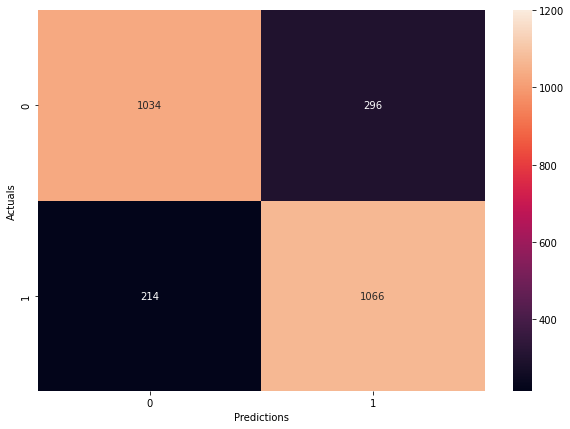

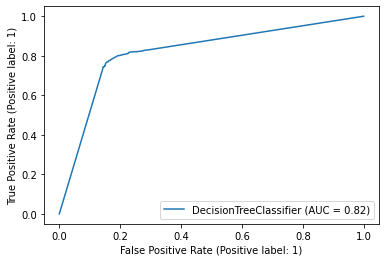

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier(random_state=72)
dtc.fit(X_train, Y_train)

dtcprediction=dtc.predict(X_test)

evaluate_model (dtc, X_test, y_test, dtcprediction)


Decision Tree : Accuracy on training Data: 0.940
Decision Tree : Accuracy on test Data: 0.800

Decision Tree : f1_score on training Data: 0.940
Decision Tree : f1_score on test Data: 0.801

Decision Tree : Recall on training Data: 0.919
Decision Tree : Recall on test Data: 0.771

Decision Tree : precision on training Data: 0.962
Decision Tree : precision on test Data: 0.834
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1248
           1       0.83      0.77      0.80      1362

    accuracy                           0.80      2610
   macro avg       0.80      0.80      0.80      2610
weighted avg       0.80      0.80      0.80      2610



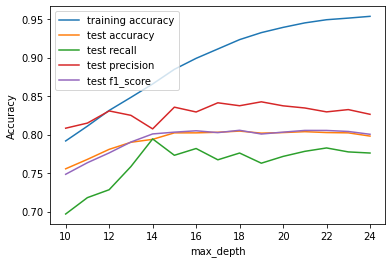

In [32]:
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train,Y_train)
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance
show_result('Decision Tree', y_train_tree, y_test_tree)

re_training(DecisionTreeClassifier, 'max_depth', min=10, max=25)

**Random Forest Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8421455938697318
2. confusion_matrix:
[[1068  232]
 [ 180 1130]]
3. recall_score:  0.8625954198473282
4. precision_score:  0.8296622613803231
5. f1_score:  0.8458083832335329
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


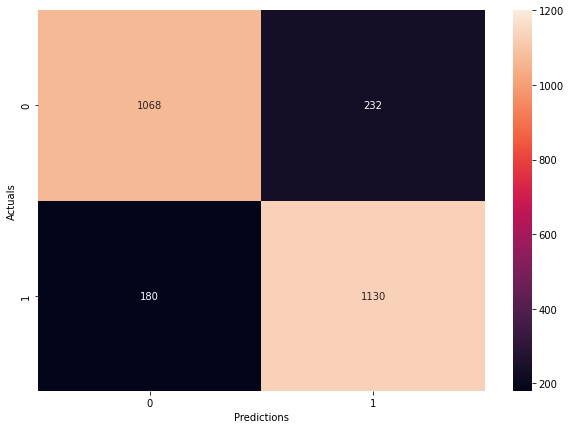

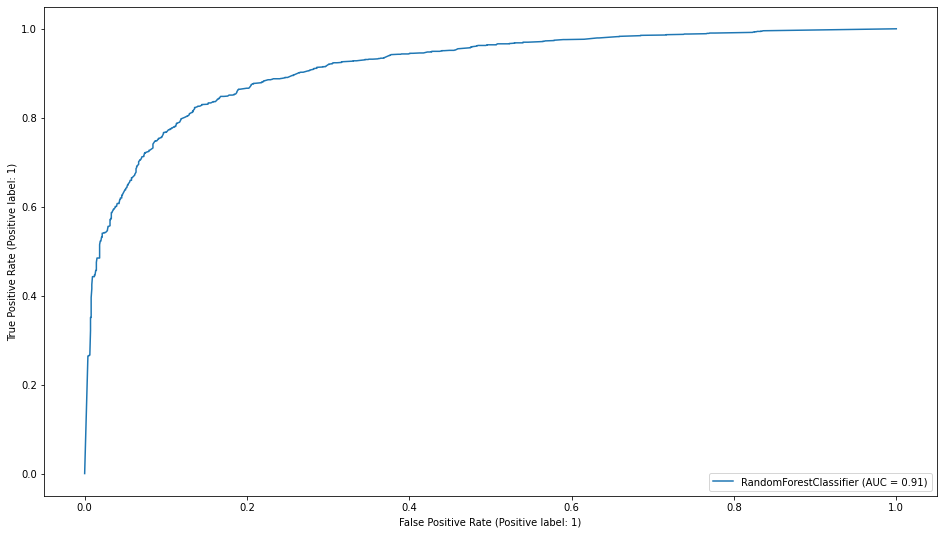

In [191]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_jobs=-1,random_state=47)
# learning
rfc.fit(X_train,Y_train)
# Prediction
rfcprediction=rfc.predict(X_test)

evaluate_model (rfc, X_test, y_test, rfcprediction)


In [245]:
# instantiate the model
forest = RandomForestClassifier(n_estimators=39)

# fit the model 
forest.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance
show_result('Random Forest', y_train_forest, y_test_forest)

# re_training(RandomForestClassifier, 'n_estimators', min=10, max=50)

Random Forest : Accuracy on training Data: 0.957
Random Forest : Accuracy on test Data: 0.834

Random Forest : f1_score on training Data: 0.958
Random Forest : f1_score on test Data: 0.837

Random Forest : Recall on training Data: 0.950
Random Forest : Recall on test Data: 0.814

Random Forest : precision on training Data: 0.966
Random Forest : precision on test Data: 0.832
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1248
           1       0.86      0.81      0.84      1362

    accuracy                           0.83      2610
   macro avg       0.83      0.84      0.83      2610
weighted avg       0.84      0.83      0.83      2610



**SVM Classifier**

In [170]:
# from sklearn import svm
# #making the instance
# svc = svm.SVC(random_state=123)
# #learning
# svc.fit(X_train,Y_train)
# #Prediction
# svcprediction=svc.predict(X_test)

# evaluate_model (svc, X_test, y_test, svcprediction)

**K-NearestNeighbours Classifier**

In [171]:
# from sklearn.neighbors import KNeighborsClassifier
# #making the instance
# knn = KNeighborsClassifier()
# #learning
# knn.fit(X_train,Y_train)
# #Prediction
# knnprediction=knn.predict(X_test)

# evaluate_model (knn, X_test, y_test, knnprediction)

**Ada Boost**

In [172]:
# from sklearn.ensemble import AdaBoostClassifier

# ada_model = AdaBoostClassifier(n_estimators=200, random_state=44)

# #learning
# ada_model.fit(X_train,Y_train)
# #Prediction
# ada_modelprediction=ada_model.predict(X_test)

# evaluate_model (ada_model, X_test, y_test, ada_modelprediction)

**XGB Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8329501915708812
2. confusion_matrix:
[[1062  250]
 [ 186 1112]]
3. recall_score:  0.8567026194144838
4. precision_score:  0.8164464023494861
5. f1_score:  0.8360902255639098
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


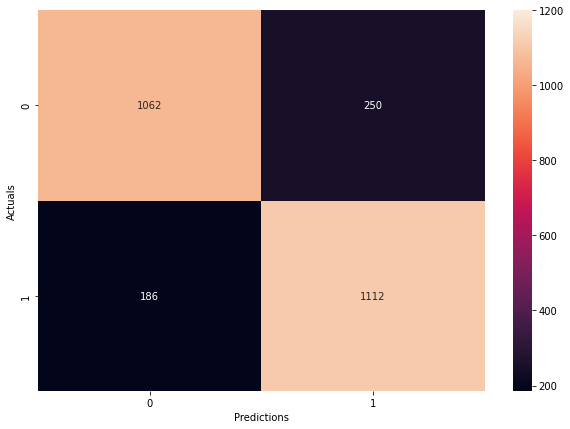

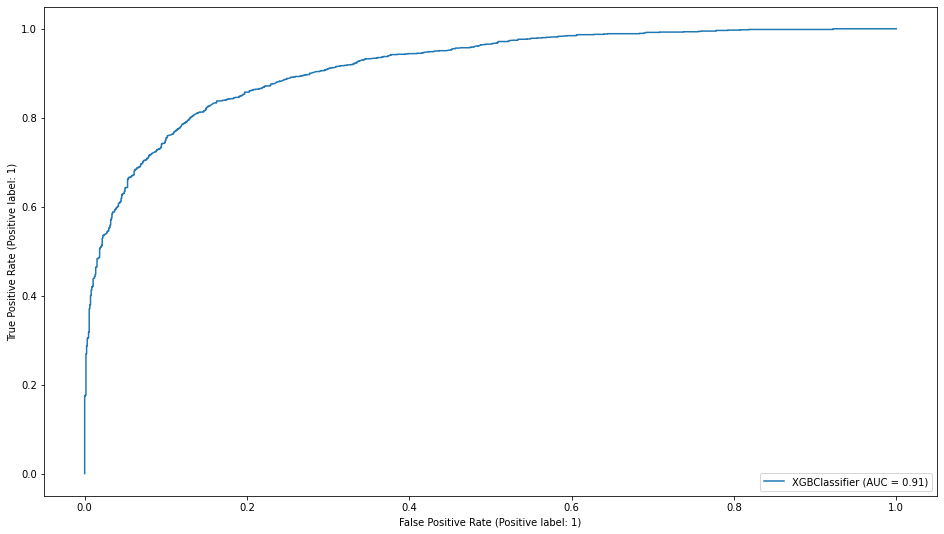

In [173]:
from xgboost import XGBClassifier

XGB_1 = XGBClassifier(objective='binary:logistic',scale_pos_weight=1,n_estimators=85, eta=0.3, subsample=1, colsample_bytree=1)

#learning
XGB_1.fit(X_train,Y_train)
#Prediction
XGB_modelprediction=XGB_1.predict(X_test)

evaluate_model (XGB_1, X_test, y_test, XGB_modelprediction)

**XGB Classifier Ver_2**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.831800766283525
2. confusion_matrix:
[[1063  254]
 [ 185 1108]]
3. recall_score:  0.8569218870843001
4. precision_score:  0.8135095447870778
5. f1_score:  0.8346516007532956
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


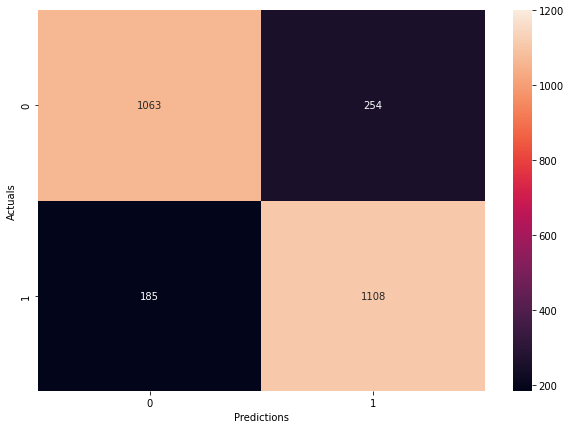

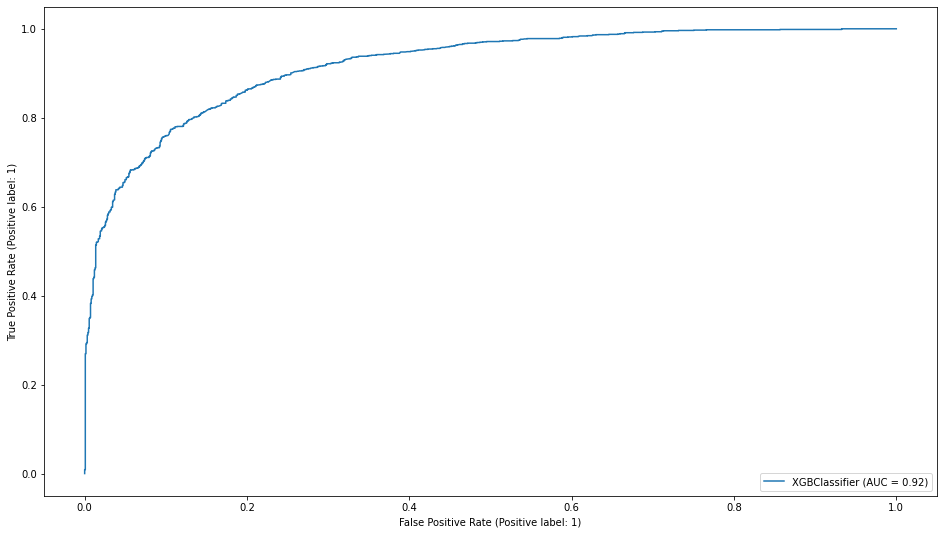

In [174]:
xgb_2 = XGBClassifier(learning_rate=0.4,max_depth=7)
#learning
xgb_2.fit(X_train,Y_train)
#Prediction
xgb_2_modelprediction_v2=xgb_2.predict(X_test)

evaluate_model (xgb_2, X_test, y_test, xgb_2_modelprediction_v2)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.831800766283525
2. confusion_matrix:
[[1063  254]
 [ 185 1108]]
3. recall_score:  0.8569218870843001
4. precision_score:  0.8135095447870778
5. f1_score:  0.8346516007532956
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


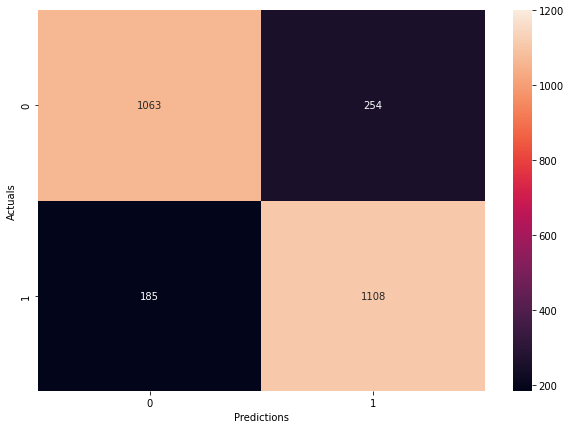

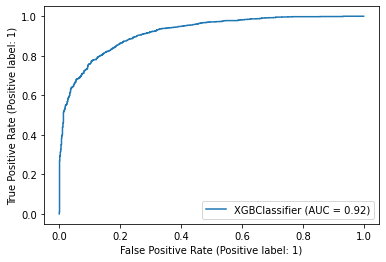

In [35]:
from xgboost import XGBClassifier

# instantiate the model
xgb_3 = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb_3.fit(X_train, Y_train)

#predicting the target value from the model for the samples
y_test_xgb = xgb_3.predict(X_test)

evaluate_model (xgb_3, X_test, y_test, y_test_xgb)

XGB : Accuracy on training Data: 0.935
XGB : Accuracy on test Data: 0.828

XGB : f1_score on training Data: 0.936
XGB : f1_score on test Data: 0.830

XGB : Recall on training Data: 0.923
XGB : Recall on test Data: 0.808

XGB : precision on training Data: 0.950
XGB : precision on test Data: 0.853
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1248
           1       0.85      0.81      0.83      1362

    accuracy                           0.83      2610
   macro avg       0.83      0.83      0.83      2610
weighted avg       0.83      0.83      0.83      2610



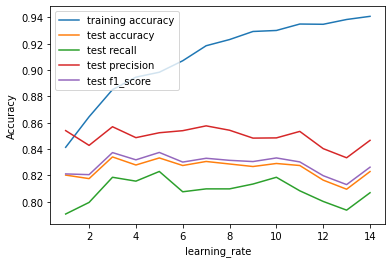

In [95]:
# instantiate the model
xgb = XGBClassifier(learning_rate=1.1)

# fit the model 
xgb.fit(X_train,y_train)

y_train_model = xgb.predict(X_train)
y_test_model = xgb.predict(X_test)

show_result('XGB', y_train_model, y_test_model)
#
re_training(XGBClassifier, 'learning_rate', 1, 15, 0.1)

In [215]:
print(training_accuracy)
print(test_accuracy)
print(model_test.score(X_train, y_train))
y_test_model = model_test.predict(X_test)
print(metrics.precision_score(y_test,y_test_model))

[0.8414143349942507, 0.8646032962821004, 0.8852050594097355, 0.8946914526638559, 0.8984285166730548, 0.907148332694519, 0.9185511690302798, 0.923246454580299, 0.9293790724415485]
[0.8203065134099616, 0.8176245210727969, 0.8340996168582375, 0.8279693486590038, 0.8333333333333334, 0.8275862068965517, 0.8306513409961686, 0.828735632183908, 0.8268199233716476]
0.9293790724415485
0.8483920367534457


**Light GBM**

In [176]:
# from lightgbm import LGBMClassifier

# lgbm_clf = LGBMClassifier(n_estimators=1000, objective='binary',
#                           class_weight={0:25, 1:1}, learning_rate=0.01,
#                           boosting_type='dart')
# lgbm_clf.fit(X_train, Y_train)

# #Prediction
# LGBM_modelprediction=lgbm_clf.predict(X_test)

# evaluate_model (lgbm_clf, X_test, y_test, LGBM_modelprediction)

**Voting Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8329501915708812
2. confusion_matrix:
[[1098  286]
 [ 150 1076]]
3. recall_score:  0.8776508972267537
4. precision_score:  0.7900146842878121
5. f1_score:  0.831530139103555
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


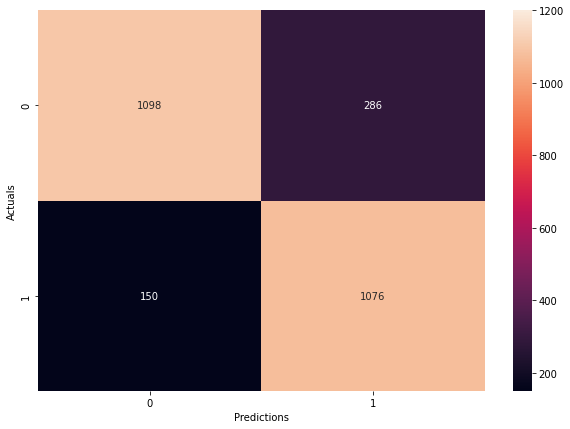

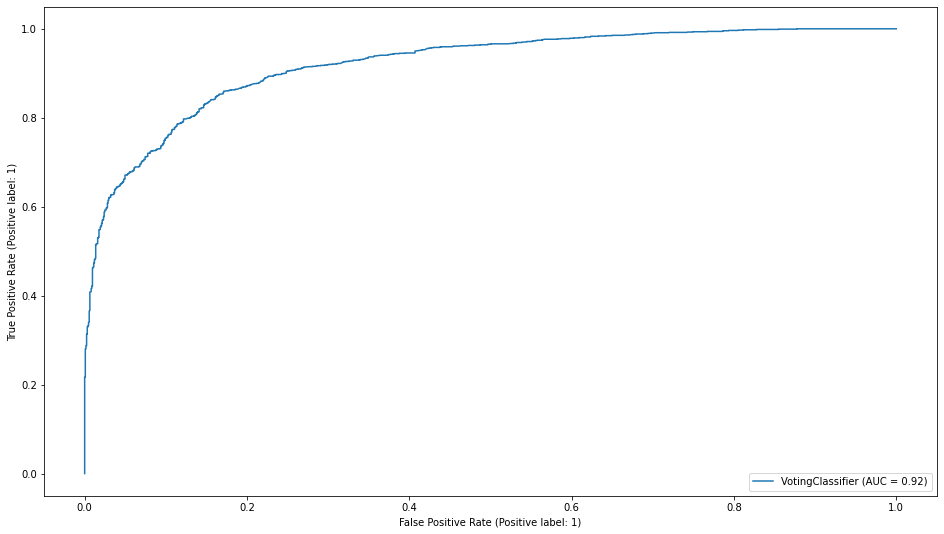

In [177]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

clf1 = RandomForestClassifier(n_estimators=200, class_weight={0: 100, 1: 1})
clf2 = GradientBoostingClassifier(n_estimators=1000, max_depth=7)
clf3 = ExtraTreesClassifier(n_estimators=1000, class_weight={0: 100, 1: 1})
clf4 = XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.01)
pos_clf = VotingClassifier(estimators=[('pos', clf1), ('gb', clf2),
                                        ('et', clf3), ('xgb', clf4)],
                            voting='soft',
                            weights=[1, 2, 1, 1])

pos_clf.fit(X_train, Y_train)

#Prediction
Vot_modelprediction=pos_clf.predict(X_test)

evaluate_model (pos_clf, X_test, y_test, Vot_modelprediction)

**Gradient Boosting Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8325670498084291
2. confusion_matrix:
[[1052  241]
 [ 196 1121]]
3. recall_score:  0.8511769172361427
4. precision_score:  0.8230543318649045
5. f1_score:  0.8368794326241135
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


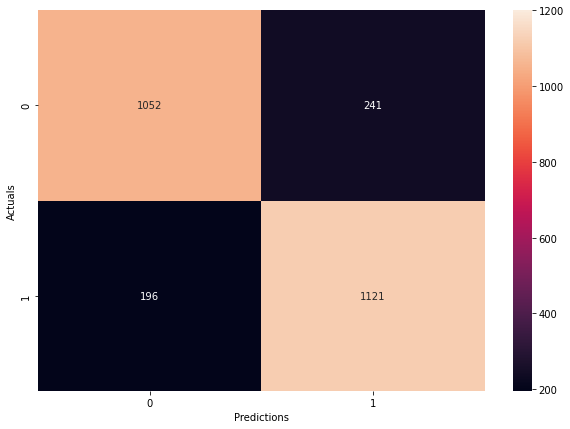

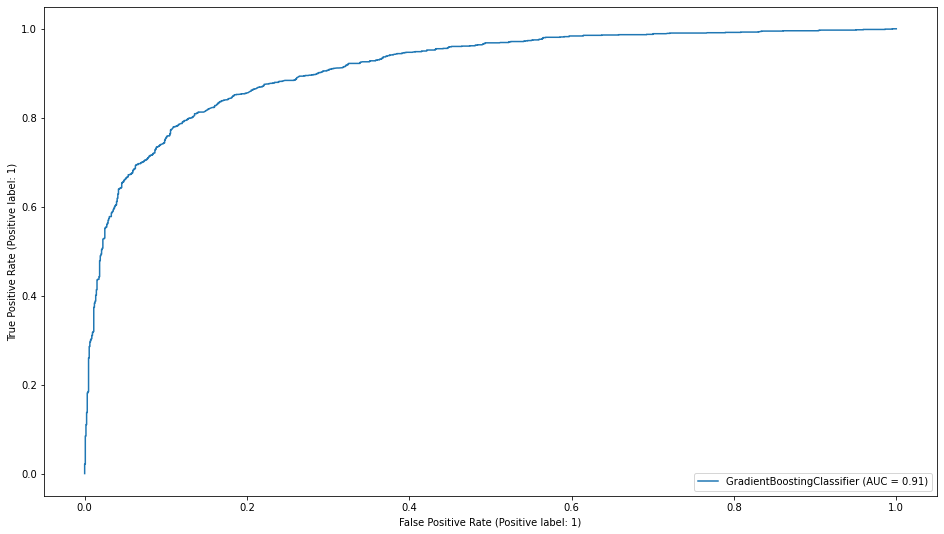

In [178]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

GBoost = GradientBoostingClassifier(n_estimators=1000, max_depth=7)


GBoost.fit(X_train, Y_train)

#Prediction
GBoost_modelprediction=GBoost.predict(X_test)

evaluate_model (GBoost, X_test, y_test, GBoost_modelprediction)

**Extra Trees Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8172413793103448
2. confusion_matrix:
[[1102  331]
 [ 146 1031]]
3. recall_score:  0.8759558198810535
4. precision_score:  0.7569750367107195
5. f1_score:  0.8121307601417881
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


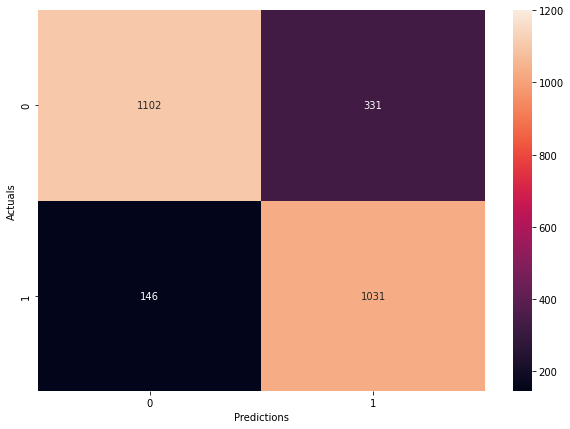

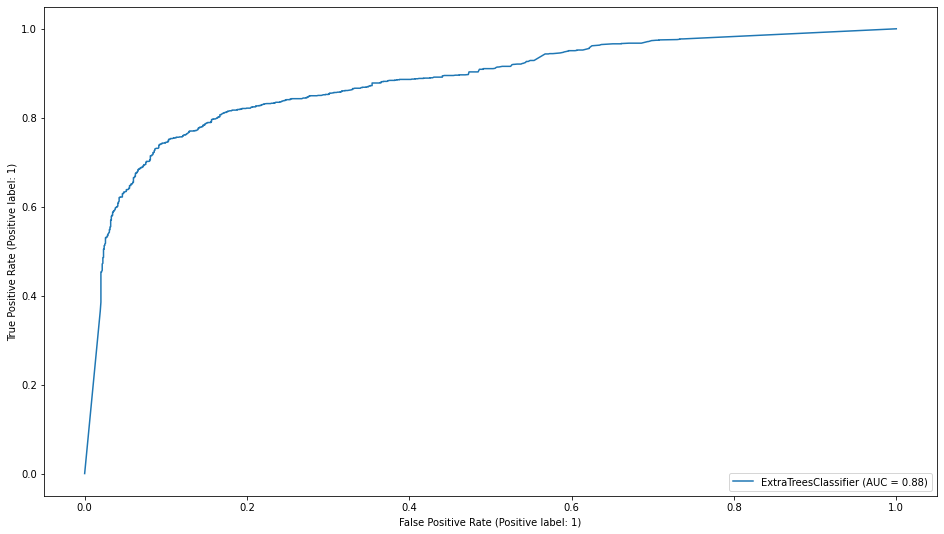

In [179]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

Extra = ExtraTreesClassifier(n_estimators=1000, class_weight={0: 100, 1: 1})


Extra.fit(X_train, Y_train)

#Prediction
Extra_modelprediction=Extra.predict(X_test)

evaluate_model (Extra, X_test, y_test, Extra_modelprediction)

**Cat Boosting**

In [180]:
# pip install catboost

CatBoost Classifier : Accuracy on training Data: 0.957
CatBoost Classifier : Accuracy on test Data: 0.831

CatBoost Classifier : f1_score on training Data: 0.958
CatBoost Classifier : f1_score on test Data: 0.835

CatBoost Classifier : Recall on training Data: 0.951
CatBoost Classifier : Recall on test Data: 0.819

CatBoost Classifier : precision on training Data: 0.965
CatBoost Classifier : precision on test Data: 0.851
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1248
           1       0.85      0.82      0.84      1362

    accuracy                           0.83      2610
   macro avg       0.83      0.83      0.83      2610
weighted avg       0.83      0.83      0.83      2610

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8363984674329502
2. confusion_matrix:
[[1066  245]
 [ 182 1117]]
3. recall_score:  0.8598922247882987
4. precision_score:  0.8201174743024964
5. f1_score:  0.8395340097707629
6. Biểu 

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


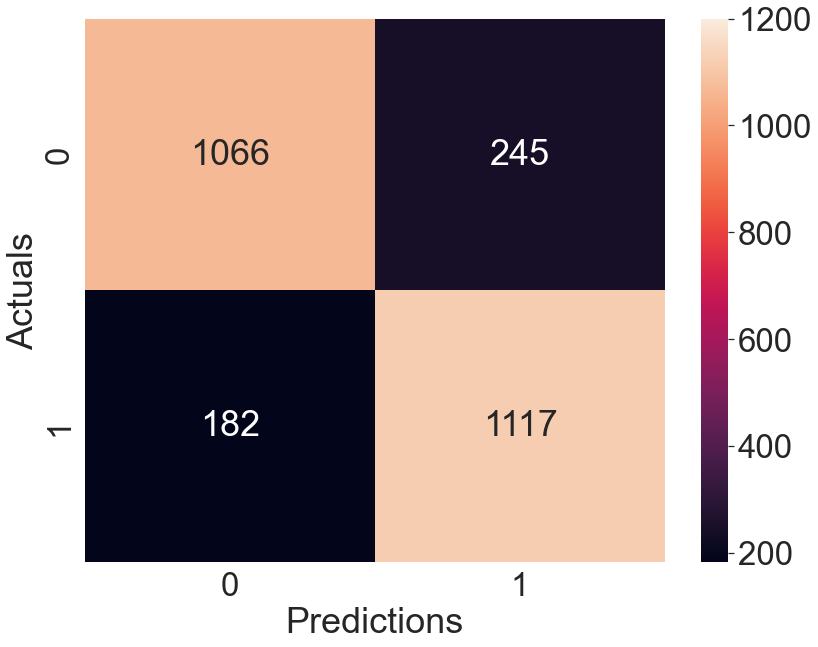

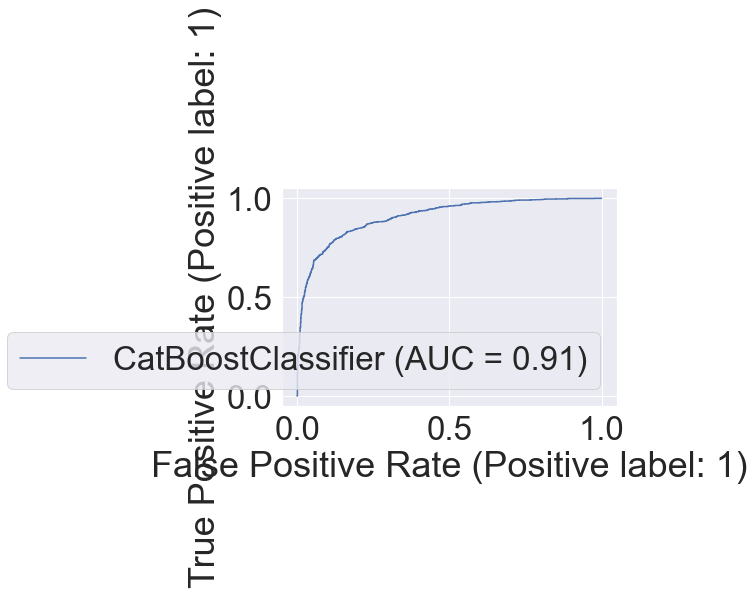

In [113]:
from catboost import CatBoostClassifier

# model_catboss = CatBoostClassifier(learning_rate = 0.1, depth = 8, rsm = 1)

# model_catboss.fit(X_train, Y_train)

#Prediction
# cast_modelprediction=model_catboss.predict(X_test)

# y_train_cat = model_catboss.predict(X_train)
# y_test_cat = model_catboss.predict(X_test)

show_result('CatBoost Classifier', y_train_cat, y_test_cat)

evaluate_model (model_catboss, X_test, y_test, cast_modelprediction)


0:	learn: 0.5720871	total: 19.5ms	remaining: 19.4s
1:	learn: 0.5304225	total: 31.5ms	remaining: 15.7s
2:	learn: 0.4828355	total: 78.4ms	remaining: 26s
3:	learn: 0.4574460	total: 90.1ms	remaining: 22.4s
4:	learn: 0.4500805	total: 100ms	remaining: 20s
5:	learn: 0.4323118	total: 111ms	remaining: 18.4s
6:	learn: 0.4240512	total: 138ms	remaining: 19.5s
7:	learn: 0.4210422	total: 151ms	remaining: 18.7s
8:	learn: 0.4184456	total: 181ms	remaining: 19.9s
9:	learn: 0.3988455	total: 194ms	remaining: 19.2s
10:	learn: 0.3921947	total: 204ms	remaining: 18.4s
11:	learn: 0.3890399	total: 214ms	remaining: 17.6s
12:	learn: 0.3848133	total: 242ms	remaining: 18.4s
13:	learn: 0.3821091	total: 256ms	remaining: 18s
14:	learn: 0.3794503	total: 266ms	remaining: 17.5s
15:	learn: 0.3703194	total: 277ms	remaining: 17.1s
16:	learn: 0.3617891	total: 287ms	remaining: 16.6s
17:	learn: 0.3569089	total: 298ms	remaining: 16.2s
18:	learn: 0.3549910	total: 307ms	remaining: 15.9s
19:	learn: 0.3480527	total: 342ms	remaining

173:	learn: 0.1674749	total: 3.11s	remaining: 14.8s
174:	learn: 0.1658400	total: 3.12s	remaining: 14.7s
175:	learn: 0.1650983	total: 3.13s	remaining: 14.7s
176:	learn: 0.1643365	total: 3.16s	remaining: 14.7s
177:	learn: 0.1636231	total: 3.17s	remaining: 14.7s
178:	learn: 0.1635443	total: 3.22s	remaining: 14.8s
179:	learn: 0.1633864	total: 3.28s	remaining: 15s
180:	learn: 0.1629733	total: 3.3s	remaining: 14.9s
181:	learn: 0.1628872	total: 3.31s	remaining: 14.9s
182:	learn: 0.1625316	total: 3.33s	remaining: 14.9s
183:	learn: 0.1618691	total: 3.34s	remaining: 14.8s
184:	learn: 0.1612070	total: 3.38s	remaining: 14.9s
185:	learn: 0.1610783	total: 3.39s	remaining: 14.8s
186:	learn: 0.1607176	total: 3.4s	remaining: 14.8s
187:	learn: 0.1602122	total: 3.41s	remaining: 14.7s
188:	learn: 0.1596552	total: 3.43s	remaining: 14.7s
189:	learn: 0.1595646	total: 3.44s	remaining: 14.7s
190:	learn: 0.1592298	total: 3.46s	remaining: 14.6s
191:	learn: 0.1591793	total: 3.46s	remaining: 14.6s
192:	learn: 0.15

336:	learn: 0.1230489	total: 6.17s	remaining: 12.1s
337:	learn: 0.1227900	total: 6.19s	remaining: 12.1s
338:	learn: 0.1227078	total: 6.2s	remaining: 12.1s
339:	learn: 0.1223296	total: 6.21s	remaining: 12.1s
340:	learn: 0.1222732	total: 6.22s	remaining: 12s
341:	learn: 0.1222101	total: 6.24s	remaining: 12s
342:	learn: 0.1220763	total: 6.25s	remaining: 12s
343:	learn: 0.1220518	total: 6.26s	remaining: 11.9s
344:	learn: 0.1217879	total: 6.27s	remaining: 11.9s
345:	learn: 0.1217222	total: 6.31s	remaining: 11.9s
346:	learn: 0.1214140	total: 6.32s	remaining: 11.9s
347:	learn: 0.1210456	total: 6.34s	remaining: 11.9s
348:	learn: 0.1209695	total: 6.35s	remaining: 11.8s
349:	learn: 0.1204722	total: 6.36s	remaining: 11.8s
350:	learn: 0.1203557	total: 6.39s	remaining: 11.8s
351:	learn: 0.1203557	total: 6.41s	remaining: 11.8s
352:	learn: 0.1203557	total: 6.42s	remaining: 11.8s
353:	learn: 0.1202995	total: 6.48s	remaining: 11.8s
354:	learn: 0.1202984	total: 6.5s	remaining: 11.8s
355:	learn: 0.120206

497:	learn: 0.1070998	total: 9.01s	remaining: 9.08s
498:	learn: 0.1070361	total: 9.03s	remaining: 9.07s
499:	learn: 0.1069716	total: 9.04s	remaining: 9.04s
500:	learn: 0.1069593	total: 9.11s	remaining: 9.07s
501:	learn: 0.1069341	total: 9.13s	remaining: 9.06s
502:	learn: 0.1069341	total: 9.14s	remaining: 9.03s
503:	learn: 0.1069340	total: 9.17s	remaining: 9.03s
504:	learn: 0.1069339	total: 9.18s	remaining: 9s
505:	learn: 0.1068831	total: 9.2s	remaining: 8.98s
506:	learn: 0.1067910	total: 9.21s	remaining: 8.95s
507:	learn: 0.1067200	total: 9.22s	remaining: 8.93s
508:	learn: 0.1066708	total: 9.23s	remaining: 8.9s
509:	learn: 0.1066299	total: 9.24s	remaining: 8.88s
510:	learn: 0.1066297	total: 9.25s	remaining: 8.85s
511:	learn: 0.1065729	total: 9.27s	remaining: 8.83s
512:	learn: 0.1065707	total: 9.27s	remaining: 8.8s
513:	learn: 0.1064867	total: 9.28s	remaining: 8.78s
514:	learn: 0.1063165	total: 9.31s	remaining: 8.77s
515:	learn: 0.1061869	total: 9.33s	remaining: 8.75s
516:	learn: 0.1060

658:	learn: 0.0990430	total: 11.6s	remaining: 6s
659:	learn: 0.0989600	total: 11.6s	remaining: 5.98s
660:	learn: 0.0989096	total: 11.6s	remaining: 5.96s
661:	learn: 0.0989090	total: 11.6s	remaining: 5.95s
662:	learn: 0.0988346	total: 11.7s	remaining: 5.93s
663:	learn: 0.0988345	total: 11.7s	remaining: 5.93s
664:	learn: 0.0988255	total: 11.7s	remaining: 5.91s
665:	learn: 0.0987658	total: 11.8s	remaining: 5.89s
666:	learn: 0.0987265	total: 11.8s	remaining: 5.87s
667:	learn: 0.0987188	total: 11.8s	remaining: 5.86s
668:	learn: 0.0987187	total: 11.8s	remaining: 5.84s
669:	learn: 0.0986643	total: 11.8s	remaining: 5.82s
670:	learn: 0.0986045	total: 11.9s	remaining: 5.83s
671:	learn: 0.0985830	total: 11.9s	remaining: 5.81s
672:	learn: 0.0985251	total: 11.9s	remaining: 5.79s
673:	learn: 0.0984928	total: 11.9s	remaining: 5.77s
674:	learn: 0.0984448	total: 11.9s	remaining: 5.75s
675:	learn: 0.0984056	total: 12s	remaining: 5.73s
676:	learn: 0.0983622	total: 12s	remaining: 5.71s
677:	learn: 0.09836

822:	learn: 0.0952860	total: 14.1s	remaining: 3.04s
823:	learn: 0.0952435	total: 14.2s	remaining: 3.02s
824:	learn: 0.0951997	total: 14.2s	remaining: 3.01s
825:	learn: 0.0951996	total: 14.2s	remaining: 3s
826:	learn: 0.0951653	total: 14.2s	remaining: 2.98s
827:	learn: 0.0951653	total: 14.2s	remaining: 2.96s
828:	learn: 0.0951650	total: 14.3s	remaining: 2.94s
829:	learn: 0.0950578	total: 14.3s	remaining: 2.92s
830:	learn: 0.0950277	total: 14.3s	remaining: 2.91s
831:	learn: 0.0949961	total: 14.3s	remaining: 2.89s
832:	learn: 0.0949944	total: 14.3s	remaining: 2.87s
833:	learn: 0.0949681	total: 14.3s	remaining: 2.85s
834:	learn: 0.0949681	total: 14.3s	remaining: 2.83s
835:	learn: 0.0949647	total: 14.4s	remaining: 2.82s
836:	learn: 0.0949646	total: 14.4s	remaining: 2.8s
837:	learn: 0.0949487	total: 14.4s	remaining: 2.78s
838:	learn: 0.0949346	total: 14.4s	remaining: 2.76s
839:	learn: 0.0948748	total: 14.5s	remaining: 2.75s
840:	learn: 0.0948748	total: 14.5s	remaining: 2.73s
841:	learn: 0.09

988:	learn: 0.0923741	total: 17s	remaining: 189ms
989:	learn: 0.0923740	total: 17s	remaining: 172ms
990:	learn: 0.0923741	total: 17s	remaining: 154ms
991:	learn: 0.0923739	total: 17s	remaining: 137ms
992:	learn: 0.0923739	total: 17s	remaining: 120ms
993:	learn: 0.0923738	total: 17s	remaining: 103ms
994:	learn: 0.0923412	total: 17.1s	remaining: 85.7ms
995:	learn: 0.0923412	total: 17.1s	remaining: 68.6ms
996:	learn: 0.0923406	total: 17.1s	remaining: 51.4ms
997:	learn: 0.0923100	total: 17.1s	remaining: 34.3ms
998:	learn: 0.0923101	total: 17.1s	remaining: 17.1ms
999:	learn: 0.0922655	total: 17.1s	remaining: 0us
CatBoost Classifier : Accuracy on training Data: 0.957
CatBoost Classifier : Accuracy on test Data: 0.831

CatBoost Classifier : f1_score on training Data: 0.958
CatBoost Classifier : f1_score on test Data: 0.835

CatBoost Classifier : Recall on training Data: 0.951
CatBoost Classifier : Recall on test Data: 0.819

CatBoost Classifier : precision on training Data: 0.965
CatBoost Cla

149:	learn: 0.3715925	total: 1.38s	remaining: 7.8s
150:	learn: 0.3712340	total: 1.39s	remaining: 7.79s
151:	learn: 0.3707458	total: 1.39s	remaining: 7.76s
152:	learn: 0.3698850	total: 1.4s	remaining: 7.74s
153:	learn: 0.3695596	total: 1.41s	remaining: 7.74s
154:	learn: 0.3688286	total: 1.42s	remaining: 7.72s
155:	learn: 0.3685528	total: 1.42s	remaining: 7.69s
156:	learn: 0.3678173	total: 1.43s	remaining: 7.67s
157:	learn: 0.3671455	total: 1.43s	remaining: 7.64s
158:	learn: 0.3664359	total: 1.46s	remaining: 7.74s
159:	learn: 0.3659464	total: 1.48s	remaining: 7.75s
160:	learn: 0.3655770	total: 1.48s	remaining: 7.73s
161:	learn: 0.3647839	total: 1.49s	remaining: 7.71s
162:	learn: 0.3642610	total: 1.5s	remaining: 7.69s
163:	learn: 0.3639801	total: 1.5s	remaining: 7.67s
164:	learn: 0.3635228	total: 1.51s	remaining: 7.65s
165:	learn: 0.3631538	total: 1.52s	remaining: 7.62s
166:	learn: 0.3628424	total: 1.52s	remaining: 7.6s
167:	learn: 0.3628322	total: 1.53s	remaining: 7.57s
168:	learn: 0.362

318:	learn: 0.3192087	total: 3.22s	remaining: 6.87s
319:	learn: 0.3189176	total: 3.23s	remaining: 6.86s
320:	learn: 0.3187212	total: 3.24s	remaining: 6.85s
321:	learn: 0.3182849	total: 3.25s	remaining: 6.85s
322:	learn: 0.3180851	total: 3.26s	remaining: 6.84s
323:	learn: 0.3177178	total: 3.27s	remaining: 6.83s
324:	learn: 0.3174944	total: 3.29s	remaining: 6.83s
325:	learn: 0.3173281	total: 3.31s	remaining: 6.84s
326:	learn: 0.3171226	total: 3.32s	remaining: 6.83s
327:	learn: 0.3171209	total: 3.33s	remaining: 6.82s
328:	learn: 0.3168404	total: 3.34s	remaining: 6.81s
329:	learn: 0.3166421	total: 3.35s	remaining: 6.8s
330:	learn: 0.3164651	total: 3.36s	remaining: 6.79s
331:	learn: 0.3162399	total: 3.37s	remaining: 6.79s
332:	learn: 0.3160250	total: 3.38s	remaining: 6.78s
333:	learn: 0.3160223	total: 3.4s	remaining: 6.77s
334:	learn: 0.3154477	total: 3.41s	remaining: 6.77s
335:	learn: 0.3153554	total: 3.42s	remaining: 6.76s
336:	learn: 0.3150039	total: 3.44s	remaining: 6.76s
337:	learn: 0.

484:	learn: 0.2877475	total: 5.29s	remaining: 5.62s
485:	learn: 0.2874334	total: 5.3s	remaining: 5.61s
486:	learn: 0.2871185	total: 5.32s	remaining: 5.6s
487:	learn: 0.2869540	total: 5.33s	remaining: 5.59s
488:	learn: 0.2869531	total: 5.34s	remaining: 5.58s
489:	learn: 0.2869120	total: 5.35s	remaining: 5.57s
490:	learn: 0.2868959	total: 5.36s	remaining: 5.55s
491:	learn: 0.2866173	total: 5.37s	remaining: 5.54s
492:	learn: 0.2864016	total: 5.38s	remaining: 5.53s
493:	learn: 0.2862428	total: 5.39s	remaining: 5.52s
494:	learn: 0.2860859	total: 5.4s	remaining: 5.51s
495:	learn: 0.2860577	total: 5.41s	remaining: 5.5s
496:	learn: 0.2859016	total: 5.42s	remaining: 5.49s
497:	learn: 0.2858887	total: 5.43s	remaining: 5.48s
498:	learn: 0.2858709	total: 5.44s	remaining: 5.46s
499:	learn: 0.2857584	total: 5.45s	remaining: 5.45s
500:	learn: 0.2856363	total: 5.47s	remaining: 5.44s
501:	learn: 0.2854655	total: 5.48s	remaining: 5.43s
502:	learn: 0.2852488	total: 5.49s	remaining: 5.42s
503:	learn: 0.28

650:	learn: 0.2660406	total: 7.18s	remaining: 3.85s
651:	learn: 0.2660393	total: 7.19s	remaining: 3.84s
652:	learn: 0.2660080	total: 7.21s	remaining: 3.83s
653:	learn: 0.2658977	total: 7.22s	remaining: 3.82s
654:	learn: 0.2658310	total: 7.23s	remaining: 3.81s
655:	learn: 0.2657498	total: 7.24s	remaining: 3.8s
656:	learn: 0.2655760	total: 7.26s	remaining: 3.79s
657:	learn: 0.2655425	total: 7.27s	remaining: 3.78s
658:	learn: 0.2655357	total: 7.28s	remaining: 3.77s
659:	learn: 0.2655161	total: 7.29s	remaining: 3.75s
660:	learn: 0.2654074	total: 7.3s	remaining: 3.74s
661:	learn: 0.2653659	total: 7.31s	remaining: 3.73s
662:	learn: 0.2652590	total: 7.32s	remaining: 3.72s
663:	learn: 0.2651833	total: 7.33s	remaining: 3.71s
664:	learn: 0.2649398	total: 7.34s	remaining: 3.7s
665:	learn: 0.2649252	total: 7.35s	remaining: 3.69s
666:	learn: 0.2648656	total: 7.37s	remaining: 3.68s
667:	learn: 0.2647553	total: 7.39s	remaining: 3.67s
668:	learn: 0.2647552	total: 7.4s	remaining: 3.66s
669:	learn: 0.26

820:	learn: 0.2509644	total: 9.04s	remaining: 1.97s
821:	learn: 0.2509644	total: 9.05s	remaining: 1.96s
822:	learn: 0.2509643	total: 9.06s	remaining: 1.95s
823:	learn: 0.2508849	total: 9.07s	remaining: 1.94s
824:	learn: 0.2508842	total: 9.08s	remaining: 1.93s
825:	learn: 0.2507507	total: 9.1s	remaining: 1.92s
826:	learn: 0.2505971	total: 9.11s	remaining: 1.91s
827:	learn: 0.2502852	total: 9.12s	remaining: 1.9s
828:	learn: 0.2501477	total: 9.13s	remaining: 1.88s
829:	learn: 0.2498806	total: 9.14s	remaining: 1.87s
830:	learn: 0.2498569	total: 9.15s	remaining: 1.86s
831:	learn: 0.2497681	total: 9.16s	remaining: 1.85s
832:	learn: 0.2496646	total: 9.17s	remaining: 1.84s
833:	learn: 0.2496003	total: 9.18s	remaining: 1.83s
834:	learn: 0.2494956	total: 9.19s	remaining: 1.82s
835:	learn: 0.2494703	total: 9.2s	remaining: 1.8s
836:	learn: 0.2494702	total: 9.21s	remaining: 1.79s
837:	learn: 0.2494428	total: 9.22s	remaining: 1.78s
838:	learn: 0.2493673	total: 9.23s	remaining: 1.77s
839:	learn: 0.24

981:	learn: 0.2398027	total: 10.7s	remaining: 196ms
982:	learn: 0.2396613	total: 10.7s	remaining: 185ms
983:	learn: 0.2395765	total: 10.7s	remaining: 174ms
984:	learn: 0.2395124	total: 10.7s	remaining: 164ms
985:	learn: 0.2394535	total: 10.7s	remaining: 153ms
986:	learn: 0.2394535	total: 10.8s	remaining: 142ms
987:	learn: 0.2394371	total: 10.8s	remaining: 131ms
988:	learn: 0.2394370	total: 10.8s	remaining: 120ms
989:	learn: 0.2394221	total: 10.8s	remaining: 109ms
990:	learn: 0.2393886	total: 10.8s	remaining: 98ms
991:	learn: 0.2392276	total: 10.8s	remaining: 87.1ms
992:	learn: 0.2392276	total: 10.8s	remaining: 76.2ms
993:	learn: 0.2392271	total: 10.8s	remaining: 65.3ms
994:	learn: 0.2392250	total: 10.8s	remaining: 54.4ms
995:	learn: 0.2392224	total: 10.8s	remaining: 43.5ms
996:	learn: 0.2391832	total: 10.8s	remaining: 32.6ms
997:	learn: 0.2391090	total: 10.9s	remaining: 21.8ms
998:	learn: 0.2390423	total: 10.9s	remaining: 10.9ms
999:	learn: 0.2389673	total: 10.9s	remaining: 0us
0:	lear

145:	learn: 0.3202535	total: 1.46s	remaining: 8.55s
146:	learn: 0.3195347	total: 1.47s	remaining: 8.55s
147:	learn: 0.3191294	total: 1.48s	remaining: 8.54s
148:	learn: 0.3187621	total: 1.49s	remaining: 8.53s
149:	learn: 0.3187461	total: 1.5s	remaining: 8.52s
150:	learn: 0.3183664	total: 1.51s	remaining: 8.52s
151:	learn: 0.3180148	total: 1.52s	remaining: 8.51s
152:	learn: 0.3171640	total: 1.54s	remaining: 8.51s
153:	learn: 0.3171566	total: 1.55s	remaining: 8.5s
154:	learn: 0.3166872	total: 1.56s	remaining: 8.5s
155:	learn: 0.3163554	total: 1.57s	remaining: 8.49s
156:	learn: 0.3157510	total: 1.58s	remaining: 8.5s
157:	learn: 0.3157452	total: 1.59s	remaining: 8.49s
158:	learn: 0.3157392	total: 1.6s	remaining: 8.48s
159:	learn: 0.3151735	total: 1.62s	remaining: 8.49s
160:	learn: 0.3143835	total: 1.63s	remaining: 8.49s
161:	learn: 0.3137572	total: 1.64s	remaining: 8.48s
162:	learn: 0.3131028	total: 1.65s	remaining: 8.48s
163:	learn: 0.3124445	total: 1.67s	remaining: 8.49s
164:	learn: 0.311

312:	learn: 0.2633090	total: 3.33s	remaining: 7.32s
313:	learn: 0.2628610	total: 3.35s	remaining: 7.31s
314:	learn: 0.2628262	total: 3.36s	remaining: 7.3s
315:	learn: 0.2623287	total: 3.37s	remaining: 7.29s
316:	learn: 0.2622764	total: 3.38s	remaining: 7.28s
317:	learn: 0.2619524	total: 3.39s	remaining: 7.27s
318:	learn: 0.2618809	total: 3.4s	remaining: 7.26s
319:	learn: 0.2615849	total: 3.41s	remaining: 7.25s
320:	learn: 0.2615354	total: 3.42s	remaining: 7.23s
321:	learn: 0.2610418	total: 3.43s	remaining: 7.22s
322:	learn: 0.2608569	total: 3.44s	remaining: 7.21s
323:	learn: 0.2606641	total: 3.45s	remaining: 7.2s
324:	learn: 0.2606072	total: 3.46s	remaining: 7.19s
325:	learn: 0.2606071	total: 3.47s	remaining: 7.17s
326:	learn: 0.2604888	total: 3.48s	remaining: 7.16s
327:	learn: 0.2602373	total: 3.49s	remaining: 7.15s
328:	learn: 0.2596654	total: 3.5s	remaining: 7.14s
329:	learn: 0.2594940	total: 3.51s	remaining: 7.13s
330:	learn: 0.2591100	total: 3.52s	remaining: 7.12s
331:	learn: 0.25

485:	learn: 0.2353792	total: 5.19s	remaining: 5.49s
486:	learn: 0.2353792	total: 5.2s	remaining: 5.48s
487:	learn: 0.2353603	total: 5.21s	remaining: 5.47s
488:	learn: 0.2350718	total: 5.22s	remaining: 5.46s
489:	learn: 0.2348517	total: 5.24s	remaining: 5.46s
490:	learn: 0.2348515	total: 5.25s	remaining: 5.44s
491:	learn: 0.2347770	total: 5.26s	remaining: 5.43s
492:	learn: 0.2345094	total: 5.27s	remaining: 5.42s
493:	learn: 0.2343582	total: 5.28s	remaining: 5.41s
494:	learn: 0.2341045	total: 5.31s	remaining: 5.41s
495:	learn: 0.2339087	total: 5.32s	remaining: 5.4s
496:	learn: 0.2339086	total: 5.32s	remaining: 5.39s
497:	learn: 0.2338506	total: 5.33s	remaining: 5.38s
498:	learn: 0.2335793	total: 5.34s	remaining: 5.37s
499:	learn: 0.2333835	total: 5.36s	remaining: 5.36s
500:	learn: 0.2333125	total: 5.37s	remaining: 5.34s
501:	learn: 0.2328725	total: 5.38s	remaining: 5.33s
502:	learn: 0.2326977	total: 5.38s	remaining: 5.32s
503:	learn: 0.2325128	total: 5.39s	remaining: 5.31s
504:	learn: 0.

661:	learn: 0.2136130	total: 7.07s	remaining: 3.61s
662:	learn: 0.2134463	total: 7.08s	remaining: 3.6s
663:	learn: 0.2134107	total: 7.09s	remaining: 3.59s
664:	learn: 0.2132650	total: 7.1s	remaining: 3.58s
665:	learn: 0.2132649	total: 7.11s	remaining: 3.56s
666:	learn: 0.2131507	total: 7.12s	remaining: 3.55s
667:	learn: 0.2131506	total: 7.13s	remaining: 3.54s
668:	learn: 0.2131485	total: 7.15s	remaining: 3.54s
669:	learn: 0.2131480	total: 7.16s	remaining: 3.53s
670:	learn: 0.2129967	total: 7.17s	remaining: 3.52s
671:	learn: 0.2128508	total: 7.18s	remaining: 3.5s
672:	learn: 0.2127430	total: 7.19s	remaining: 3.49s
673:	learn: 0.2126715	total: 7.2s	remaining: 3.48s
674:	learn: 0.2124491	total: 7.21s	remaining: 3.47s
675:	learn: 0.2123301	total: 7.22s	remaining: 3.46s
676:	learn: 0.2121894	total: 7.23s	remaining: 3.45s
677:	learn: 0.2120801	total: 7.24s	remaining: 3.44s
678:	learn: 0.2118624	total: 7.25s	remaining: 3.43s
679:	learn: 0.2118362	total: 7.26s	remaining: 3.42s
680:	learn: 0.21

839:	learn: 0.1966905	total: 8.94s	remaining: 1.7s
840:	learn: 0.1966905	total: 8.95s	remaining: 1.69s
841:	learn: 0.1966902	total: 8.96s	remaining: 1.68s
842:	learn: 0.1966580	total: 8.97s	remaining: 1.67s
843:	learn: 0.1965188	total: 8.98s	remaining: 1.66s
844:	learn: 0.1963349	total: 8.99s	remaining: 1.65s
845:	learn: 0.1962656	total: 9s	remaining: 1.64s
846:	learn: 0.1961531	total: 9.01s	remaining: 1.63s
847:	learn: 0.1960094	total: 9.02s	remaining: 1.62s
848:	learn: 0.1958524	total: 9.03s	remaining: 1.61s
849:	learn: 0.1957941	total: 9.04s	remaining: 1.59s
850:	learn: 0.1956873	total: 9.05s	remaining: 1.58s
851:	learn: 0.1956013	total: 9.06s	remaining: 1.57s
852:	learn: 0.1954778	total: 9.07s	remaining: 1.56s
853:	learn: 0.1954240	total: 9.08s	remaining: 1.55s
854:	learn: 0.1953737	total: 9.09s	remaining: 1.54s
855:	learn: 0.1953524	total: 9.1s	remaining: 1.53s
856:	learn: 0.1953523	total: 9.11s	remaining: 1.52s
857:	learn: 0.1953438	total: 9.12s	remaining: 1.51s
858:	learn: 0.195

0:	learn: 0.6241190	total: 8.55ms	remaining: 8.54s
1:	learn: 0.5888977	total: 17.7ms	remaining: 8.85s
2:	learn: 0.5567827	total: 26.7ms	remaining: 8.86s
3:	learn: 0.5384293	total: 35.7ms	remaining: 8.88s
4:	learn: 0.5225739	total: 45.2ms	remaining: 8.99s
5:	learn: 0.5155505	total: 54ms	remaining: 8.95s
6:	learn: 0.5070151	total: 63.1ms	remaining: 8.95s
7:	learn: 0.4934820	total: 72.4ms	remaining: 8.98s
8:	learn: 0.4861563	total: 81.6ms	remaining: 8.98s
9:	learn: 0.4730147	total: 90.8ms	remaining: 8.99s
10:	learn: 0.4660668	total: 99.8ms	remaining: 8.98s
11:	learn: 0.4614222	total: 109ms	remaining: 8.97s
12:	learn: 0.4585927	total: 118ms	remaining: 8.92s
13:	learn: 0.4534532	total: 136ms	remaining: 9.55s
14:	learn: 0.4479353	total: 145ms	remaining: 9.52s
15:	learn: 0.4400585	total: 154ms	remaining: 9.48s
16:	learn: 0.4362824	total: 163ms	remaining: 9.45s
17:	learn: 0.4340683	total: 173ms	remaining: 9.42s
18:	learn: 0.4325718	total: 182ms	remaining: 9.39s
19:	learn: 0.4295638	total: 194m

170:	learn: 0.2801769	total: 1.86s	remaining: 9.01s
171:	learn: 0.2795786	total: 1.87s	remaining: 9s
172:	learn: 0.2791893	total: 1.88s	remaining: 9s
173:	learn: 0.2786328	total: 1.89s	remaining: 8.99s
174:	learn: 0.2786287	total: 1.9s	remaining: 8.98s
175:	learn: 0.2784538	total: 1.92s	remaining: 8.96s
176:	learn: 0.2781028	total: 1.93s	remaining: 8.96s
177:	learn: 0.2774393	total: 1.94s	remaining: 8.95s
178:	learn: 0.2774376	total: 1.95s	remaining: 8.93s
179:	learn: 0.2773230	total: 1.96s	remaining: 8.92s
180:	learn: 0.2766280	total: 1.97s	remaining: 8.91s
181:	learn: 0.2766103	total: 1.98s	remaining: 8.9s
182:	learn: 0.2760086	total: 1.99s	remaining: 8.9s
183:	learn: 0.2751042	total: 2s	remaining: 8.89s
184:	learn: 0.2749638	total: 2.02s	remaining: 8.88s
185:	learn: 0.2744812	total: 2.03s	remaining: 8.87s
186:	learn: 0.2740532	total: 2.04s	remaining: 8.86s
187:	learn: 0.2738766	total: 2.05s	remaining: 8.85s
188:	learn: 0.2731723	total: 2.06s	remaining: 8.85s
189:	learn: 0.2727070	to

338:	learn: 0.2329495	total: 3.72s	remaining: 7.25s
339:	learn: 0.2328944	total: 3.73s	remaining: 7.25s
340:	learn: 0.2327116	total: 3.74s	remaining: 7.24s
341:	learn: 0.2323290	total: 3.76s	remaining: 7.23s
342:	learn: 0.2320645	total: 3.77s	remaining: 7.22s
343:	learn: 0.2317089	total: 3.78s	remaining: 7.21s
344:	learn: 0.2315445	total: 3.79s	remaining: 7.2s
345:	learn: 0.2314883	total: 3.81s	remaining: 7.19s
346:	learn: 0.2312525	total: 3.82s	remaining: 7.18s
347:	learn: 0.2310580	total: 3.83s	remaining: 7.18s
348:	learn: 0.2309184	total: 3.84s	remaining: 7.17s
349:	learn: 0.2305404	total: 3.85s	remaining: 7.16s
350:	learn: 0.2300653	total: 3.87s	remaining: 7.15s
351:	learn: 0.2298231	total: 3.88s	remaining: 7.14s
352:	learn: 0.2295092	total: 3.89s	remaining: 7.13s
353:	learn: 0.2295091	total: 3.9s	remaining: 7.11s
354:	learn: 0.2293387	total: 3.91s	remaining: 7.1s
355:	learn: 0.2286721	total: 3.92s	remaining: 7.09s
356:	learn: 0.2282671	total: 3.93s	remaining: 7.08s
357:	learn: 0.2

514:	learn: 0.2023666	total: 5.58s	remaining: 5.25s
515:	learn: 0.2020737	total: 5.59s	remaining: 5.24s
516:	learn: 0.2019733	total: 5.6s	remaining: 5.23s
517:	learn: 0.2019392	total: 5.61s	remaining: 5.22s
518:	learn: 0.2019391	total: 5.62s	remaining: 5.21s
519:	learn: 0.2017979	total: 5.63s	remaining: 5.2s
520:	learn: 0.2015927	total: 5.64s	remaining: 5.18s
521:	learn: 0.2014931	total: 5.65s	remaining: 5.17s
522:	learn: 0.2014930	total: 5.66s	remaining: 5.16s
523:	learn: 0.2014674	total: 5.67s	remaining: 5.15s
524:	learn: 0.2014674	total: 5.67s	remaining: 5.13s
525:	learn: 0.2014523	total: 5.68s	remaining: 5.12s
526:	learn: 0.2014523	total: 5.69s	remaining: 5.11s
527:	learn: 0.2014436	total: 5.7s	remaining: 5.1s
528:	learn: 0.2013362	total: 5.71s	remaining: 5.09s
529:	learn: 0.2010671	total: 5.72s	remaining: 5.08s
530:	learn: 0.2006441	total: 5.74s	remaining: 5.07s
531:	learn: 0.2006441	total: 5.74s	remaining: 5.05s
532:	learn: 0.2006431	total: 5.75s	remaining: 5.04s
533:	learn: 0.20

677:	learn: 0.1854901	total: 7.2s	remaining: 3.42s
678:	learn: 0.1854309	total: 7.21s	remaining: 3.41s
679:	learn: 0.1853560	total: 7.22s	remaining: 3.4s
680:	learn: 0.1853559	total: 7.24s	remaining: 3.39s
681:	learn: 0.1852811	total: 7.25s	remaining: 3.38s
682:	learn: 0.1851842	total: 7.26s	remaining: 3.37s
683:	learn: 0.1851805	total: 7.28s	remaining: 3.36s
684:	learn: 0.1851804	total: 7.28s	remaining: 3.35s
685:	learn: 0.1851059	total: 7.29s	remaining: 3.34s
686:	learn: 0.1849321	total: 7.3s	remaining: 3.33s
687:	learn: 0.1848904	total: 7.31s	remaining: 3.32s
688:	learn: 0.1845497	total: 7.32s	remaining: 3.31s
689:	learn: 0.1842500	total: 7.33s	remaining: 3.29s
690:	learn: 0.1840970	total: 7.34s	remaining: 3.28s
691:	learn: 0.1839131	total: 7.36s	remaining: 3.27s
692:	learn: 0.1839131	total: 7.36s	remaining: 3.26s
693:	learn: 0.1838373	total: 7.37s	remaining: 3.25s
694:	learn: 0.1835794	total: 7.38s	remaining: 3.24s
695:	learn: 0.1835004	total: 7.39s	remaining: 3.23s
696:	learn: 0.1

856:	learn: 0.1660993	total: 9.06s	remaining: 1.51s
857:	learn: 0.1660107	total: 9.07s	remaining: 1.5s
858:	learn: 0.1659688	total: 9.08s	remaining: 1.49s
859:	learn: 0.1659684	total: 9.09s	remaining: 1.48s
860:	learn: 0.1659644	total: 9.1s	remaining: 1.47s
861:	learn: 0.1659644	total: 9.11s	remaining: 1.46s
862:	learn: 0.1659642	total: 9.11s	remaining: 1.45s
863:	learn: 0.1659590	total: 9.12s	remaining: 1.44s
864:	learn: 0.1659590	total: 9.13s	remaining: 1.43s
865:	learn: 0.1659429	total: 9.14s	remaining: 1.41s
866:	learn: 0.1659427	total: 9.15s	remaining: 1.4s
867:	learn: 0.1659427	total: 9.16s	remaining: 1.39s
868:	learn: 0.1659021	total: 9.17s	remaining: 1.38s
869:	learn: 0.1659021	total: 9.17s	remaining: 1.37s
870:	learn: 0.1658917	total: 9.18s	remaining: 1.36s
871:	learn: 0.1658916	total: 9.19s	remaining: 1.35s
872:	learn: 0.1658916	total: 9.2s	remaining: 1.34s
873:	learn: 0.1658915	total: 9.21s	remaining: 1.33s
874:	learn: 0.1658915	total: 9.21s	remaining: 1.31s
875:	learn: 0.16

21:	learn: 0.4153014	total: 212ms	remaining: 9.43s
22:	learn: 0.4091883	total: 223ms	remaining: 9.49s
23:	learn: 0.4046729	total: 231ms	remaining: 9.41s
24:	learn: 0.4035945	total: 239ms	remaining: 9.33s
25:	learn: 0.3991190	total: 248ms	remaining: 9.29s
26:	learn: 0.3950656	total: 271ms	remaining: 9.76s
27:	learn: 0.3900553	total: 281ms	remaining: 9.77s
28:	learn: 0.3898871	total: 289ms	remaining: 9.67s
29:	learn: 0.3878853	total: 297ms	remaining: 9.6s
30:	learn: 0.3877272	total: 305ms	remaining: 9.52s
31:	learn: 0.3869266	total: 331ms	remaining: 10s
32:	learn: 0.3836875	total: 342ms	remaining: 10s
33:	learn: 0.3801014	total: 351ms	remaining: 9.96s
34:	learn: 0.3769615	total: 359ms	remaining: 9.89s
35:	learn: 0.3750488	total: 367ms	remaining: 9.82s
36:	learn: 0.3732606	total: 375ms	remaining: 9.77s
37:	learn: 0.3710508	total: 383ms	remaining: 9.69s
38:	learn: 0.3701531	total: 391ms	remaining: 9.63s
39:	learn: 0.3678033	total: 399ms	remaining: 9.56s
40:	learn: 0.3676249	total: 406ms	re

188:	learn: 0.2548872	total: 1.85s	remaining: 7.94s
189:	learn: 0.2548380	total: 1.86s	remaining: 7.93s
190:	learn: 0.2543337	total: 1.87s	remaining: 7.92s
191:	learn: 0.2538479	total: 1.88s	remaining: 7.92s
192:	learn: 0.2538447	total: 1.89s	remaining: 7.9s
193:	learn: 0.2538406	total: 1.9s	remaining: 7.89s
194:	learn: 0.2534244	total: 1.91s	remaining: 7.89s
195:	learn: 0.2529618	total: 1.92s	remaining: 7.88s
196:	learn: 0.2525295	total: 1.93s	remaining: 7.87s
197:	learn: 0.2519616	total: 1.94s	remaining: 7.87s
198:	learn: 0.2518599	total: 1.95s	remaining: 7.86s
199:	learn: 0.2512096	total: 1.96s	remaining: 7.85s
200:	learn: 0.2508776	total: 1.97s	remaining: 7.84s
201:	learn: 0.2501321	total: 1.98s	remaining: 7.84s
202:	learn: 0.2499212	total: 1.99s	remaining: 7.83s
203:	learn: 0.2492705	total: 2s	remaining: 7.82s
204:	learn: 0.2489869	total: 2.02s	remaining: 7.82s
205:	learn: 0.2485621	total: 2.02s	remaining: 7.81s
206:	learn: 0.2479527	total: 2.05s	remaining: 7.86s
207:	learn: 0.247

347:	learn: 0.2061279	total: 3.51s	remaining: 6.57s
348:	learn: 0.2057153	total: 3.52s	remaining: 6.56s
349:	learn: 0.2050068	total: 3.53s	remaining: 6.55s
350:	learn: 0.2048405	total: 3.54s	remaining: 6.54s
351:	learn: 0.2045288	total: 3.55s	remaining: 6.53s
352:	learn: 0.2042629	total: 3.56s	remaining: 6.52s
353:	learn: 0.2041427	total: 3.57s	remaining: 6.51s
354:	learn: 0.2039504	total: 3.58s	remaining: 6.5s
355:	learn: 0.2034562	total: 3.59s	remaining: 6.49s
356:	learn: 0.2030309	total: 3.6s	remaining: 6.48s
357:	learn: 0.2027841	total: 3.61s	remaining: 6.47s
358:	learn: 0.2023768	total: 3.62s	remaining: 6.46s
359:	learn: 0.2022513	total: 3.63s	remaining: 6.45s
360:	learn: 0.2020939	total: 3.64s	remaining: 6.44s
361:	learn: 0.2019981	total: 3.65s	remaining: 6.43s
362:	learn: 0.2019836	total: 3.66s	remaining: 6.42s
363:	learn: 0.2017796	total: 3.67s	remaining: 6.41s
364:	learn: 0.2014628	total: 3.68s	remaining: 6.4s
365:	learn: 0.2013572	total: 3.69s	remaining: 6.39s
366:	learn: 0.2

507:	learn: 0.1762053	total: 5.18s	remaining: 5.01s
508:	learn: 0.1761993	total: 5.19s	remaining: 5s
509:	learn: 0.1761665	total: 5.2s	remaining: 4.99s
510:	learn: 0.1760088	total: 5.21s	remaining: 4.98s
511:	learn: 0.1759291	total: 5.22s	remaining: 4.97s
512:	learn: 0.1757654	total: 5.23s	remaining: 4.96s
513:	learn: 0.1756539	total: 5.24s	remaining: 4.96s
514:	learn: 0.1755808	total: 5.25s	remaining: 4.95s
515:	learn: 0.1754331	total: 5.26s	remaining: 4.93s
516:	learn: 0.1752722	total: 5.27s	remaining: 4.92s
517:	learn: 0.1750088	total: 5.28s	remaining: 4.91s
518:	learn: 0.1749511	total: 5.29s	remaining: 4.9s
519:	learn: 0.1747458	total: 5.3s	remaining: 4.89s
520:	learn: 0.1746325	total: 5.31s	remaining: 4.88s
521:	learn: 0.1744578	total: 5.32s	remaining: 4.87s
522:	learn: 0.1743213	total: 5.33s	remaining: 4.86s
523:	learn: 0.1742079	total: 5.36s	remaining: 4.87s
524:	learn: 0.1739853	total: 5.37s	remaining: 4.86s
525:	learn: 0.1736964	total: 5.38s	remaining: 4.85s
526:	learn: 0.1736

683:	learn: 0.1554487	total: 7.06s	remaining: 3.26s
684:	learn: 0.1552848	total: 7.07s	remaining: 3.25s
685:	learn: 0.1550055	total: 7.08s	remaining: 3.24s
686:	learn: 0.1548874	total: 7.09s	remaining: 3.23s
687:	learn: 0.1547931	total: 7.1s	remaining: 3.22s
688:	learn: 0.1546608	total: 7.11s	remaining: 3.21s
689:	learn: 0.1545425	total: 7.13s	remaining: 3.2s
690:	learn: 0.1544618	total: 7.13s	remaining: 3.19s
691:	learn: 0.1543558	total: 7.14s	remaining: 3.18s
692:	learn: 0.1542899	total: 7.16s	remaining: 3.17s
693:	learn: 0.1540030	total: 7.17s	remaining: 3.16s
694:	learn: 0.1538980	total: 7.18s	remaining: 3.15s
695:	learn: 0.1538352	total: 7.19s	remaining: 3.14s
696:	learn: 0.1537113	total: 7.2s	remaining: 3.13s
697:	learn: 0.1534572	total: 7.21s	remaining: 3.12s
698:	learn: 0.1534096	total: 7.22s	remaining: 3.11s
699:	learn: 0.1533966	total: 7.23s	remaining: 3.1s
700:	learn: 0.1532098	total: 7.24s	remaining: 3.09s
701:	learn: 0.1531237	total: 7.25s	remaining: 3.08s
702:	learn: 0.15

865:	learn: 0.1421941	total: 8.91s	remaining: 1.38s
866:	learn: 0.1421918	total: 8.91s	remaining: 1.37s
867:	learn: 0.1421918	total: 8.92s	remaining: 1.36s
868:	learn: 0.1421917	total: 8.93s	remaining: 1.34s
869:	learn: 0.1421916	total: 8.93s	remaining: 1.33s
870:	learn: 0.1421916	total: 8.94s	remaining: 1.32s
871:	learn: 0.1421916	total: 8.95s	remaining: 1.31s
872:	learn: 0.1421910	total: 8.95s	remaining: 1.3s
873:	learn: 0.1421910	total: 8.96s	remaining: 1.29s
874:	learn: 0.1421909	total: 8.96s	remaining: 1.28s
875:	learn: 0.1421909	total: 8.97s	remaining: 1.27s
876:	learn: 0.1421908	total: 8.98s	remaining: 1.26s
877:	learn: 0.1421863	total: 8.98s	remaining: 1.25s
878:	learn: 0.1421861	total: 8.99s	remaining: 1.24s
879:	learn: 0.1421861	total: 9s	remaining: 1.23s
880:	learn: 0.1421860	total: 9.01s	remaining: 1.22s
881:	learn: 0.1421793	total: 9.01s	remaining: 1.21s
882:	learn: 0.1421793	total: 9.02s	remaining: 1.19s
883:	learn: 0.1421699	total: 9.03s	remaining: 1.18s
884:	learn: 0.14

44:	learn: 0.3451503	total: 423ms	remaining: 8.97s
45:	learn: 0.3432535	total: 432ms	remaining: 8.96s
46:	learn: 0.3431182	total: 440ms	remaining: 8.93s
47:	learn: 0.3406619	total: 450ms	remaining: 8.92s
48:	learn: 0.3398199	total: 458ms	remaining: 8.89s
49:	learn: 0.3396638	total: 466ms	remaining: 8.86s
50:	learn: 0.3387095	total: 475ms	remaining: 8.84s
51:	learn: 0.3364995	total: 485ms	remaining: 8.83s
52:	learn: 0.3341604	total: 502ms	remaining: 8.97s
53:	learn: 0.3333679	total: 512ms	remaining: 8.96s
54:	learn: 0.3313830	total: 521ms	remaining: 8.95s
55:	learn: 0.3299592	total: 531ms	remaining: 8.94s
56:	learn: 0.3285637	total: 540ms	remaining: 8.93s
57:	learn: 0.3267344	total: 550ms	remaining: 8.93s
58:	learn: 0.3255053	total: 559ms	remaining: 8.91s
59:	learn: 0.3245580	total: 567ms	remaining: 8.89s
60:	learn: 0.3230094	total: 577ms	remaining: 8.88s
61:	learn: 0.3217490	total: 586ms	remaining: 8.87s
62:	learn: 0.3217168	total: 595ms	remaining: 8.85s
63:	learn: 0.3209895	total: 628

221:	learn: 0.2210154	total: 2.28s	remaining: 7.98s
222:	learn: 0.2205647	total: 2.29s	remaining: 7.97s
223:	learn: 0.2204077	total: 2.3s	remaining: 7.95s
224:	learn: 0.2201282	total: 2.3s	remaining: 7.94s
225:	learn: 0.2198175	total: 2.31s	remaining: 7.92s
226:	learn: 0.2195935	total: 2.32s	remaining: 7.91s
227:	learn: 0.2189518	total: 2.33s	remaining: 7.89s
228:	learn: 0.2183378	total: 2.34s	remaining: 7.88s
229:	learn: 0.2177246	total: 2.35s	remaining: 7.87s
230:	learn: 0.2172741	total: 2.36s	remaining: 7.86s
231:	learn: 0.2171863	total: 2.37s	remaining: 7.84s
232:	learn: 0.2171863	total: 2.38s	remaining: 7.82s
233:	learn: 0.2169656	total: 2.39s	remaining: 7.81s
234:	learn: 0.2163908	total: 2.4s	remaining: 7.8s
235:	learn: 0.2162144	total: 2.41s	remaining: 7.79s
236:	learn: 0.2155290	total: 2.42s	remaining: 7.78s
237:	learn: 0.2151293	total: 2.43s	remaining: 7.77s
238:	learn: 0.2150045	total: 2.44s	remaining: 7.76s
239:	learn: 0.2145506	total: 2.45s	remaining: 7.75s
240:	learn: 0.21

381:	learn: 0.1835046	total: 3.95s	remaining: 6.4s
382:	learn: 0.1831998	total: 3.96s	remaining: 6.39s
383:	learn: 0.1829933	total: 3.99s	remaining: 6.4s
384:	learn: 0.1828684	total: 4s	remaining: 6.39s
385:	learn: 0.1826271	total: 4.01s	remaining: 6.38s
386:	learn: 0.1824022	total: 4.02s	remaining: 6.36s
387:	learn: 0.1822799	total: 4.03s	remaining: 6.35s
388:	learn: 0.1821829	total: 4.04s	remaining: 6.34s
389:	learn: 0.1820444	total: 4.05s	remaining: 6.33s
390:	learn: 0.1818006	total: 4.06s	remaining: 6.32s
391:	learn: 0.1817707	total: 4.07s	remaining: 6.31s
392:	learn: 0.1813058	total: 4.08s	remaining: 6.29s
393:	learn: 0.1813054	total: 4.1s	remaining: 6.3s
394:	learn: 0.1812160	total: 4.11s	remaining: 6.29s
395:	learn: 0.1811734	total: 4.13s	remaining: 6.3s
396:	learn: 0.1807521	total: 4.14s	remaining: 6.29s
397:	learn: 0.1805868	total: 4.15s	remaining: 6.28s
398:	learn: 0.1803587	total: 4.18s	remaining: 6.29s
399:	learn: 0.1802595	total: 4.19s	remaining: 6.28s
400:	learn: 0.180258

559:	learn: 0.1541873	total: 5.84s	remaining: 4.58s
560:	learn: 0.1541211	total: 5.85s	remaining: 4.57s
561:	learn: 0.1539639	total: 5.86s	remaining: 4.56s
562:	learn: 0.1539174	total: 5.87s	remaining: 4.55s
563:	learn: 0.1536320	total: 5.89s	remaining: 4.55s
564:	learn: 0.1535238	total: 5.9s	remaining: 4.54s
565:	learn: 0.1534149	total: 5.91s	remaining: 4.53s
566:	learn: 0.1530828	total: 5.92s	remaining: 4.52s
567:	learn: 0.1528747	total: 5.93s	remaining: 4.51s
568:	learn: 0.1528368	total: 5.94s	remaining: 4.5s
569:	learn: 0.1527902	total: 5.95s	remaining: 4.49s
570:	learn: 0.1526279	total: 5.96s	remaining: 4.47s
571:	learn: 0.1523259	total: 5.97s	remaining: 4.46s
572:	learn: 0.1522694	total: 5.98s	remaining: 4.46s
573:	learn: 0.1522362	total: 5.99s	remaining: 4.45s
574:	learn: 0.1521115	total: 6s	remaining: 4.43s
575:	learn: 0.1520979	total: 6.01s	remaining: 4.42s
576:	learn: 0.1520878	total: 6.02s	remaining: 4.41s
577:	learn: 0.1520338	total: 6.03s	remaining: 4.4s
578:	learn: 0.1520

724:	learn: 0.1393246	total: 7.49s	remaining: 2.84s
725:	learn: 0.1393233	total: 7.5s	remaining: 2.83s
726:	learn: 0.1393115	total: 7.51s	remaining: 2.82s
727:	learn: 0.1393111	total: 7.51s	remaining: 2.81s
728:	learn: 0.1393111	total: 7.52s	remaining: 2.79s
729:	learn: 0.1393029	total: 7.53s	remaining: 2.79s
730:	learn: 0.1392433	total: 7.54s	remaining: 2.77s
731:	learn: 0.1391264	total: 7.55s	remaining: 2.76s
732:	learn: 0.1390580	total: 7.56s	remaining: 2.75s
733:	learn: 0.1390579	total: 7.57s	remaining: 2.74s
734:	learn: 0.1390393	total: 7.58s	remaining: 2.73s
735:	learn: 0.1389255	total: 7.59s	remaining: 2.72s
736:	learn: 0.1388967	total: 7.6s	remaining: 2.71s
737:	learn: 0.1388967	total: 7.6s	remaining: 2.7s
738:	learn: 0.1388836	total: 7.61s	remaining: 2.69s
739:	learn: 0.1388627	total: 7.62s	remaining: 2.68s
740:	learn: 0.1388528	total: 7.63s	remaining: 2.67s
741:	learn: 0.1388383	total: 7.64s	remaining: 2.66s
742:	learn: 0.1388381	total: 7.65s	remaining: 2.65s
743:	learn: 0.13

893:	learn: 0.1305240	total: 9.16s	remaining: 1.09s
894:	learn: 0.1303502	total: 9.17s	remaining: 1.08s
895:	learn: 0.1302543	total: 9.18s	remaining: 1.06s
896:	learn: 0.1302539	total: 9.19s	remaining: 1.05s
897:	learn: 0.1302539	total: 9.2s	remaining: 1.04s
898:	learn: 0.1302537	total: 9.2s	remaining: 1.03s
899:	learn: 0.1302536	total: 9.21s	remaining: 1.02s
900:	learn: 0.1302428	total: 9.22s	remaining: 1.01s
901:	learn: 0.1301962	total: 9.23s	remaining: 1s
902:	learn: 0.1300788	total: 9.24s	remaining: 992ms
903:	learn: 0.1299699	total: 9.25s	remaining: 982ms
904:	learn: 0.1297834	total: 9.26s	remaining: 972ms
905:	learn: 0.1296664	total: 9.27s	remaining: 962ms
906:	learn: 0.1296265	total: 9.28s	remaining: 951ms
907:	learn: 0.1295447	total: 9.29s	remaining: 941ms
908:	learn: 0.1294691	total: 9.3s	remaining: 931ms
909:	learn: 0.1294686	total: 9.3s	remaining: 920ms
910:	learn: 0.1294181	total: 9.31s	remaining: 910ms
911:	learn: 0.1291336	total: 9.32s	remaining: 900ms
912:	learn: 0.12913

68:	learn: 0.3108779	total: 626ms	remaining: 8.45s
69:	learn: 0.3098640	total: 636ms	remaining: 8.45s
70:	learn: 0.3092602	total: 645ms	remaining: 8.44s
71:	learn: 0.3092425	total: 654ms	remaining: 8.43s
72:	learn: 0.3077608	total: 664ms	remaining: 8.43s
73:	learn: 0.3075186	total: 673ms	remaining: 8.43s
74:	learn: 0.3060093	total: 683ms	remaining: 8.42s
75:	learn: 0.3041491	total: 692ms	remaining: 8.42s
76:	learn: 0.3034600	total: 702ms	remaining: 8.41s
77:	learn: 0.3014006	total: 712ms	remaining: 8.42s
78:	learn: 0.3010816	total: 722ms	remaining: 8.41s
79:	learn: 0.2995152	total: 731ms	remaining: 8.41s
80:	learn: 0.2987874	total: 741ms	remaining: 8.4s
81:	learn: 0.2976566	total: 750ms	remaining: 8.4s
82:	learn: 0.2959414	total: 761ms	remaining: 8.4s
83:	learn: 0.2930690	total: 770ms	remaining: 8.4s
84:	learn: 0.2925151	total: 780ms	remaining: 8.39s
85:	learn: 0.2912392	total: 789ms	remaining: 8.39s
86:	learn: 0.2900643	total: 799ms	remaining: 8.38s
87:	learn: 0.2887500	total: 809ms	r

243:	learn: 0.2003703	total: 2.49s	remaining: 7.72s
244:	learn: 0.1999416	total: 2.5s	remaining: 7.71s
245:	learn: 0.1997431	total: 2.51s	remaining: 7.7s
246:	learn: 0.1994362	total: 2.52s	remaining: 7.69s
247:	learn: 0.1988114	total: 2.53s	remaining: 7.68s
248:	learn: 0.1986187	total: 2.54s	remaining: 7.67s
249:	learn: 0.1982160	total: 2.55s	remaining: 7.66s
250:	learn: 0.1975218	total: 2.56s	remaining: 7.65s
251:	learn: 0.1971501	total: 2.57s	remaining: 7.64s
252:	learn: 0.1967947	total: 2.58s	remaining: 7.63s
253:	learn: 0.1963996	total: 2.59s	remaining: 7.62s
254:	learn: 0.1962540	total: 2.6s	remaining: 7.61s
255:	learn: 0.1960369	total: 2.61s	remaining: 7.6s
256:	learn: 0.1960282	total: 2.62s	remaining: 7.59s
257:	learn: 0.1959436	total: 2.64s	remaining: 7.59s
258:	learn: 0.1955102	total: 2.66s	remaining: 7.62s
259:	learn: 0.1953347	total: 2.67s	remaining: 7.61s
260:	learn: 0.1947805	total: 2.68s	remaining: 7.6s
261:	learn: 0.1945610	total: 2.69s	remaining: 7.59s
262:	learn: 0.194

421:	learn: 0.1623513	total: 4.34s	remaining: 5.95s
422:	learn: 0.1623320	total: 4.35s	remaining: 5.94s
423:	learn: 0.1618799	total: 4.37s	remaining: 5.93s
424:	learn: 0.1617318	total: 4.38s	remaining: 5.92s
425:	learn: 0.1613758	total: 4.39s	remaining: 5.91s
426:	learn: 0.1610266	total: 4.4s	remaining: 5.9s
427:	learn: 0.1606528	total: 4.41s	remaining: 5.89s
428:	learn: 0.1605186	total: 4.42s	remaining: 5.88s
429:	learn: 0.1605185	total: 4.43s	remaining: 5.87s
430:	learn: 0.1604761	total: 4.44s	remaining: 5.86s
431:	learn: 0.1600929	total: 4.45s	remaining: 5.85s
432:	learn: 0.1600710	total: 4.46s	remaining: 5.84s
433:	learn: 0.1599369	total: 4.47s	remaining: 5.83s
434:	learn: 0.1596584	total: 4.48s	remaining: 5.82s
435:	learn: 0.1594883	total: 4.49s	remaining: 5.81s
436:	learn: 0.1592284	total: 4.5s	remaining: 5.8s
437:	learn: 0.1590405	total: 4.52s	remaining: 5.79s
438:	learn: 0.1587858	total: 4.53s	remaining: 5.79s
439:	learn: 0.1586717	total: 4.54s	remaining: 5.78s
440:	learn: 0.15

581:	learn: 0.1409035	total: 6.21s	remaining: 4.46s
582:	learn: 0.1408125	total: 6.22s	remaining: 4.45s
583:	learn: 0.1407852	total: 6.23s	remaining: 4.44s
584:	learn: 0.1407598	total: 6.24s	remaining: 4.43s
585:	learn: 0.1407489	total: 6.25s	remaining: 4.42s
586:	learn: 0.1407489	total: 6.26s	remaining: 4.41s
587:	learn: 0.1407486	total: 6.27s	remaining: 4.39s
588:	learn: 0.1407485	total: 6.28s	remaining: 4.38s
589:	learn: 0.1407485	total: 6.29s	remaining: 4.37s
590:	learn: 0.1407407	total: 6.3s	remaining: 4.36s
591:	learn: 0.1406401	total: 6.31s	remaining: 4.35s
592:	learn: 0.1406399	total: 6.32s	remaining: 4.34s
593:	learn: 0.1406162	total: 6.33s	remaining: 4.33s
594:	learn: 0.1403709	total: 6.34s	remaining: 4.32s
595:	learn: 0.1401397	total: 6.35s	remaining: 4.31s
596:	learn: 0.1399540	total: 6.36s	remaining: 4.29s
597:	learn: 0.1398181	total: 6.37s	remaining: 4.29s
598:	learn: 0.1397354	total: 6.38s	remaining: 4.27s
599:	learn: 0.1396823	total: 6.4s	remaining: 4.26s
600:	learn: 0.

749:	learn: 0.1256469	total: 8.06s	remaining: 2.69s
750:	learn: 0.1255804	total: 8.07s	remaining: 2.67s
751:	learn: 0.1255620	total: 8.08s	remaining: 2.66s
752:	learn: 0.1255473	total: 8.09s	remaining: 2.65s
753:	learn: 0.1255112	total: 8.1s	remaining: 2.64s
754:	learn: 0.1253891	total: 8.11s	remaining: 2.63s
755:	learn: 0.1253556	total: 8.12s	remaining: 2.62s
756:	learn: 0.1253554	total: 8.13s	remaining: 2.61s
757:	learn: 0.1253554	total: 8.14s	remaining: 2.6s
758:	learn: 0.1253521	total: 8.15s	remaining: 2.59s
759:	learn: 0.1253521	total: 8.15s	remaining: 2.57s
760:	learn: 0.1253520	total: 8.16s	remaining: 2.56s
761:	learn: 0.1253520	total: 8.17s	remaining: 2.55s
762:	learn: 0.1253455	total: 8.18s	remaining: 2.54s
763:	learn: 0.1253447	total: 8.19s	remaining: 2.53s
764:	learn: 0.1253419	total: 8.2s	remaining: 2.52s
765:	learn: 0.1253100	total: 8.21s	remaining: 2.51s
766:	learn: 0.1252173	total: 8.22s	remaining: 2.5s
767:	learn: 0.1249534	total: 8.23s	remaining: 2.49s
768:	learn: 0.12

917:	learn: 0.1163724	total: 9.94s	remaining: 888ms
918:	learn: 0.1163445	total: 9.95s	remaining: 877ms
919:	learn: 0.1162964	total: 9.96s	remaining: 867ms
920:	learn: 0.1162959	total: 9.97s	remaining: 855ms
921:	learn: 0.1162892	total: 9.98s	remaining: 845ms
922:	learn: 0.1162203	total: 10s	remaining: 835ms
923:	learn: 0.1161485	total: 10s	remaining: 825ms
924:	learn: 0.1160944	total: 10s	remaining: 814ms
925:	learn: 0.1160936	total: 10.1s	remaining: 803ms
926:	learn: 0.1160935	total: 10.1s	remaining: 792ms
927:	learn: 0.1160934	total: 10.1s	remaining: 781ms
928:	learn: 0.1160934	total: 10.1s	remaining: 770ms
929:	learn: 0.1160933	total: 10.1s	remaining: 758ms
930:	learn: 0.1160933	total: 10.1s	remaining: 747ms
931:	learn: 0.1160932	total: 10.1s	remaining: 736ms
932:	learn: 0.1160803	total: 10.1s	remaining: 725ms
933:	learn: 0.1160798	total: 10.1s	remaining: 714ms
934:	learn: 0.1160797	total: 10.1s	remaining: 703ms
935:	learn: 0.1160794	total: 10.1s	remaining: 692ms
936:	learn: 0.1160

80:	learn: 0.2853045	total: 834ms	remaining: 9.46s
81:	learn: 0.2843541	total: 845ms	remaining: 9.46s
82:	learn: 0.2827073	total: 855ms	remaining: 9.45s
83:	learn: 0.2815096	total: 866ms	remaining: 9.45s
84:	learn: 0.2795662	total: 877ms	remaining: 9.44s
85:	learn: 0.2786183	total: 888ms	remaining: 9.44s
86:	learn: 0.2770955	total: 899ms	remaining: 9.43s
87:	learn: 0.2770325	total: 908ms	remaining: 9.41s
88:	learn: 0.2754822	total: 919ms	remaining: 9.41s
89:	learn: 0.2740997	total: 930ms	remaining: 9.4s
90:	learn: 0.2727748	total: 940ms	remaining: 9.39s
91:	learn: 0.2713564	total: 951ms	remaining: 9.39s
92:	learn: 0.2700388	total: 962ms	remaining: 9.38s
93:	learn: 0.2692514	total: 973ms	remaining: 9.37s
94:	learn: 0.2682267	total: 983ms	remaining: 9.37s
95:	learn: 0.2678404	total: 993ms	remaining: 9.35s
96:	learn: 0.2672798	total: 1s	remaining: 9.34s
97:	learn: 0.2666492	total: 1.01s	remaining: 9.33s
98:	learn: 0.2663787	total: 1.02s	remaining: 9.32s
99:	learn: 0.2646025	total: 1.03s	r

249:	learn: 0.1884890	total: 2.68s	remaining: 8.04s
250:	learn: 0.1882115	total: 2.69s	remaining: 8.03s
251:	learn: 0.1881846	total: 2.71s	remaining: 8.03s
252:	learn: 0.1880157	total: 2.72s	remaining: 8.02s
253:	learn: 0.1875555	total: 2.73s	remaining: 8.01s
254:	learn: 0.1871263	total: 2.74s	remaining: 8s
255:	learn: 0.1867715	total: 2.76s	remaining: 8.01s
256:	learn: 0.1865517	total: 2.77s	remaining: 8s
257:	learn: 0.1861158	total: 2.78s	remaining: 7.99s
258:	learn: 0.1857376	total: 2.79s	remaining: 7.98s
259:	learn: 0.1855492	total: 2.8s	remaining: 7.97s
260:	learn: 0.1854320	total: 2.81s	remaining: 7.96s
261:	learn: 0.1851129	total: 2.82s	remaining: 7.95s
262:	learn: 0.1848992	total: 2.83s	remaining: 7.93s
263:	learn: 0.1847016	total: 2.84s	remaining: 7.92s
264:	learn: 0.1841554	total: 2.85s	remaining: 7.91s
265:	learn: 0.1841114	total: 2.86s	remaining: 7.9s
266:	learn: 0.1836250	total: 2.87s	remaining: 7.89s
267:	learn: 0.1833352	total: 2.88s	remaining: 7.87s
268:	learn: 0.183047

427:	learn: 0.1464763	total: 4.53s	remaining: 6.06s
428:	learn: 0.1463170	total: 4.54s	remaining: 6.05s
429:	learn: 0.1462127	total: 4.55s	remaining: 6.04s
430:	learn: 0.1458731	total: 4.57s	remaining: 6.03s
431:	learn: 0.1456912	total: 4.58s	remaining: 6.02s
432:	learn: 0.1455291	total: 4.59s	remaining: 6.01s
433:	learn: 0.1453551	total: 4.6s	remaining: 6s
434:	learn: 0.1451968	total: 4.61s	remaining: 5.99s
435:	learn: 0.1448705	total: 4.62s	remaining: 5.97s
436:	learn: 0.1446463	total: 4.63s	remaining: 5.96s
437:	learn: 0.1445284	total: 4.64s	remaining: 5.95s
438:	learn: 0.1444948	total: 4.65s	remaining: 5.94s
439:	learn: 0.1444803	total: 4.66s	remaining: 5.93s
440:	learn: 0.1442581	total: 4.67s	remaining: 5.92s
441:	learn: 0.1439415	total: 4.68s	remaining: 5.91s
442:	learn: 0.1438184	total: 4.69s	remaining: 5.9s
443:	learn: 0.1436882	total: 4.7s	remaining: 5.89s
444:	learn: 0.1435197	total: 4.71s	remaining: 5.88s
445:	learn: 0.1434416	total: 4.72s	remaining: 5.87s
446:	learn: 0.1432

591:	learn: 0.1285005	total: 6.23s	remaining: 4.29s
592:	learn: 0.1284571	total: 6.24s	remaining: 4.28s
593:	learn: 0.1284153	total: 6.25s	remaining: 4.27s
594:	learn: 0.1282546	total: 6.26s	remaining: 4.26s
595:	learn: 0.1282125	total: 6.27s	remaining: 4.25s
596:	learn: 0.1281458	total: 6.28s	remaining: 4.24s
597:	learn: 0.1279438	total: 6.29s	remaining: 4.23s
598:	learn: 0.1277601	total: 6.3s	remaining: 4.22s
599:	learn: 0.1276242	total: 6.31s	remaining: 4.21s
600:	learn: 0.1275959	total: 6.32s	remaining: 4.19s
601:	learn: 0.1275461	total: 6.33s	remaining: 4.18s
602:	learn: 0.1273403	total: 6.35s	remaining: 4.18s
603:	learn: 0.1273100	total: 6.36s	remaining: 4.17s
604:	learn: 0.1271892	total: 6.37s	remaining: 4.16s
605:	learn: 0.1270963	total: 6.38s	remaining: 4.15s
606:	learn: 0.1270575	total: 6.39s	remaining: 4.14s
607:	learn: 0.1268331	total: 6.4s	remaining: 4.13s
608:	learn: 0.1267810	total: 6.41s	remaining: 4.12s
609:	learn: 0.1264593	total: 6.42s	remaining: 4.11s
610:	learn: 0.

752:	learn: 0.1205416	total: 7.65s	remaining: 2.51s
753:	learn: 0.1205252	total: 7.66s	remaining: 2.5s
754:	learn: 0.1205251	total: 7.67s	remaining: 2.49s
755:	learn: 0.1205251	total: 7.68s	remaining: 2.48s
756:	learn: 0.1205249	total: 7.68s	remaining: 2.47s
757:	learn: 0.1205248	total: 7.69s	remaining: 2.46s
758:	learn: 0.1205248	total: 7.7s	remaining: 2.44s
759:	learn: 0.1205247	total: 7.7s	remaining: 2.43s
760:	learn: 0.1205247	total: 7.71s	remaining: 2.42s
761:	learn: 0.1205246	total: 7.72s	remaining: 2.41s
762:	learn: 0.1205240	total: 7.73s	remaining: 2.4s
763:	learn: 0.1205237	total: 7.74s	remaining: 2.39s
764:	learn: 0.1205237	total: 7.74s	remaining: 2.38s
765:	learn: 0.1205236	total: 7.75s	remaining: 2.37s
766:	learn: 0.1205223	total: 7.76s	remaining: 2.36s
767:	learn: 0.1204914	total: 7.77s	remaining: 2.35s
768:	learn: 0.1204072	total: 7.78s	remaining: 2.34s
769:	learn: 0.1203531	total: 7.79s	remaining: 2.33s
770:	learn: 0.1203223	total: 7.82s	remaining: 2.32s
771:	learn: 0.12

927:	learn: 0.1117383	total: 9.3s	remaining: 721ms
928:	learn: 0.1117378	total: 9.3s	remaining: 711ms
929:	learn: 0.1117378	total: 9.31s	remaining: 701ms
930:	learn: 0.1117378	total: 9.32s	remaining: 691ms
931:	learn: 0.1117378	total: 9.33s	remaining: 681ms
932:	learn: 0.1117378	total: 9.33s	remaining: 670ms
933:	learn: 0.1117377	total: 9.34s	remaining: 660ms
934:	learn: 0.1117377	total: 9.35s	remaining: 650ms
935:	learn: 0.1117376	total: 9.36s	remaining: 640ms
936:	learn: 0.1117377	total: 9.36s	remaining: 630ms
937:	learn: 0.1117377	total: 9.37s	remaining: 619ms
938:	learn: 0.1117376	total: 9.38s	remaining: 609ms
939:	learn: 0.1117376	total: 9.38s	remaining: 599ms
940:	learn: 0.1117376	total: 9.39s	remaining: 589ms
941:	learn: 0.1117376	total: 9.4s	remaining: 579ms
942:	learn: 0.1117376	total: 9.4s	remaining: 568ms
943:	learn: 0.1117375	total: 9.41s	remaining: 558ms
944:	learn: 0.1117375	total: 9.42s	remaining: 548ms
945:	learn: 0.1117375	total: 9.43s	remaining: 538ms
946:	learn: 0.11

105:	learn: 0.2393660	total: 1.05s	remaining: 8.88s
106:	learn: 0.2383771	total: 1.06s	remaining: 8.86s
107:	learn: 0.2381460	total: 1.07s	remaining: 8.84s
108:	learn: 0.2377607	total: 1.08s	remaining: 8.82s
109:	learn: 0.2371585	total: 1.09s	remaining: 8.81s
110:	learn: 0.2371508	total: 1.1s	remaining: 8.81s
111:	learn: 0.2368113	total: 1.11s	remaining: 8.79s
112:	learn: 0.2364810	total: 1.12s	remaining: 8.77s
113:	learn: 0.2350119	total: 1.13s	remaining: 8.76s
114:	learn: 0.2337173	total: 1.14s	remaining: 8.74s
115:	learn: 0.2328670	total: 1.14s	remaining: 8.72s
116:	learn: 0.2319180	total: 1.15s	remaining: 8.71s
117:	learn: 0.2311151	total: 1.16s	remaining: 8.7s
118:	learn: 0.2308409	total: 1.17s	remaining: 8.69s
119:	learn: 0.2302055	total: 1.18s	remaining: 8.68s
120:	learn: 0.2291310	total: 1.19s	remaining: 8.67s
121:	learn: 0.2284869	total: 1.2s	remaining: 8.66s
122:	learn: 0.2275667	total: 1.21s	remaining: 8.64s
123:	learn: 0.2269622	total: 1.22s	remaining: 8.63s
124:	learn: 0.2

282:	learn: 0.1656557	total: 2.9s	remaining: 7.35s
283:	learn: 0.1651935	total: 2.91s	remaining: 7.34s
284:	learn: 0.1651565	total: 2.92s	remaining: 7.33s
285:	learn: 0.1647650	total: 2.93s	remaining: 7.32s
286:	learn: 0.1645178	total: 2.94s	remaining: 7.32s
287:	learn: 0.1644145	total: 2.96s	remaining: 7.3s
288:	learn: 0.1643486	total: 2.97s	remaining: 7.3s
289:	learn: 0.1642650	total: 2.98s	remaining: 7.29s
290:	learn: 0.1642650	total: 2.98s	remaining: 7.27s
291:	learn: 0.1642411	total: 2.99s	remaining: 7.26s
292:	learn: 0.1642411	total: 3s	remaining: 7.24s
293:	learn: 0.1642410	total: 3.01s	remaining: 7.22s
294:	learn: 0.1642409	total: 3.01s	remaining: 7.2s
295:	learn: 0.1642096	total: 3.02s	remaining: 7.19s
296:	learn: 0.1640386	total: 3.04s	remaining: 7.18s
297:	learn: 0.1639625	total: 3.05s	remaining: 7.18s
298:	learn: 0.1637617	total: 3.06s	remaining: 7.17s
299:	learn: 0.1635083	total: 3.07s	remaining: 7.17s
300:	learn: 0.1633002	total: 3.08s	remaining: 7.16s
301:	learn: 0.16318

451:	learn: 0.1372921	total: 4.78s	remaining: 5.79s
452:	learn: 0.1372519	total: 4.79s	remaining: 5.78s
453:	learn: 0.1369496	total: 4.8s	remaining: 5.77s
454:	learn: 0.1367858	total: 4.81s	remaining: 5.77s
455:	learn: 0.1365578	total: 4.83s	remaining: 5.76s
456:	learn: 0.1364978	total: 4.84s	remaining: 5.75s
457:	learn: 0.1364406	total: 4.85s	remaining: 5.74s
458:	learn: 0.1363486	total: 4.86s	remaining: 5.73s
459:	learn: 0.1362004	total: 4.88s	remaining: 5.72s
460:	learn: 0.1361802	total: 4.89s	remaining: 5.71s
461:	learn: 0.1359238	total: 4.9s	remaining: 5.71s
462:	learn: 0.1358075	total: 4.91s	remaining: 5.7s
463:	learn: 0.1356888	total: 4.92s	remaining: 5.69s
464:	learn: 0.1355497	total: 4.93s	remaining: 5.68s
465:	learn: 0.1354850	total: 4.95s	remaining: 5.67s
466:	learn: 0.1353988	total: 4.96s	remaining: 5.66s
467:	learn: 0.1352501	total: 4.97s	remaining: 5.65s
468:	learn: 0.1350496	total: 4.98s	remaining: 5.64s
469:	learn: 0.1349549	total: 4.99s	remaining: 5.63s
470:	learn: 0.1

613:	learn: 0.1200162	total: 6.62s	remaining: 4.16s
614:	learn: 0.1200161	total: 6.62s	remaining: 4.14s
615:	learn: 0.1200160	total: 6.63s	remaining: 4.13s
616:	learn: 0.1200160	total: 6.64s	remaining: 4.12s
617:	learn: 0.1200160	total: 6.64s	remaining: 4.11s
618:	learn: 0.1200159	total: 6.65s	remaining: 4.09s
619:	learn: 0.1200158	total: 6.66s	remaining: 4.08s
620:	learn: 0.1200157	total: 6.67s	remaining: 4.07s
621:	learn: 0.1200157	total: 6.67s	remaining: 4.06s
622:	learn: 0.1200156	total: 6.68s	remaining: 4.04s
623:	learn: 0.1200155	total: 6.69s	remaining: 4.03s
624:	learn: 0.1200149	total: 6.71s	remaining: 4.03s
625:	learn: 0.1200149	total: 6.72s	remaining: 4.01s
626:	learn: 0.1200149	total: 6.72s	remaining: 4s
627:	learn: 0.1200149	total: 6.73s	remaining: 3.99s
628:	learn: 0.1200148	total: 6.74s	remaining: 3.97s
629:	learn: 0.1200147	total: 6.75s	remaining: 3.96s
630:	learn: 0.1200146	total: 6.75s	remaining: 3.95s
631:	learn: 0.1200143	total: 6.77s	remaining: 3.94s
632:	learn: 0.1

791:	learn: 0.1082411	total: 8.43s	remaining: 2.21s
792:	learn: 0.1080975	total: 8.44s	remaining: 2.2s
793:	learn: 0.1080178	total: 8.45s	remaining: 2.19s
794:	learn: 0.1079374	total: 8.46s	remaining: 2.18s
795:	learn: 0.1079266	total: 8.46s	remaining: 2.17s
796:	learn: 0.1078697	total: 8.47s	remaining: 2.16s
797:	learn: 0.1078320	total: 8.48s	remaining: 2.15s
798:	learn: 0.1078194	total: 8.49s	remaining: 2.14s
799:	learn: 0.1077748	total: 8.51s	remaining: 2.13s
800:	learn: 0.1076800	total: 8.52s	remaining: 2.12s
801:	learn: 0.1076128	total: 8.53s	remaining: 2.1s
802:	learn: 0.1075123	total: 8.54s	remaining: 2.09s
803:	learn: 0.1074304	total: 8.55s	remaining: 2.08s
804:	learn: 0.1073761	total: 8.56s	remaining: 2.07s
805:	learn: 0.1073532	total: 8.57s	remaining: 2.06s
806:	learn: 0.1072946	total: 8.58s	remaining: 2.05s
807:	learn: 0.1072488	total: 8.59s	remaining: 2.04s
808:	learn: 0.1072249	total: 8.6s	remaining: 2.03s
809:	learn: 0.1071874	total: 8.61s	remaining: 2.02s
810:	learn: 0.1

954:	learn: 0.1032560	total: 9.98s	remaining: 470ms
955:	learn: 0.1032560	total: 9.99s	remaining: 460ms
956:	learn: 0.1032560	total: 9.99s	remaining: 449ms
957:	learn: 0.1032464	total: 10s	remaining: 439ms
958:	learn: 0.1032461	total: 10s	remaining: 428ms
959:	learn: 0.1032461	total: 10s	remaining: 417ms
960:	learn: 0.1032461	total: 10s	remaining: 407ms
961:	learn: 0.1032461	total: 10s	remaining: 396ms
962:	learn: 0.1032457	total: 10s	remaining: 386ms
963:	learn: 0.1032456	total: 10s	remaining: 375ms
964:	learn: 0.1032457	total: 10.1s	remaining: 365ms
965:	learn: 0.1032455	total: 10.1s	remaining: 354ms
966:	learn: 0.1032455	total: 10.1s	remaining: 343ms
967:	learn: 0.1032455	total: 10.1s	remaining: 333ms
968:	learn: 0.1032453	total: 10.1s	remaining: 322ms
969:	learn: 0.1032451	total: 10.1s	remaining: 312ms
970:	learn: 0.1032452	total: 10.1s	remaining: 301ms
971:	learn: 0.1032451	total: 10.1s	remaining: 291ms
972:	learn: 0.1032451	total: 10.1s	remaining: 280ms
973:	learn: 0.1032340	tota

118:	learn: 0.2311052	total: 1.26s	remaining: 9.31s
119:	learn: 0.2299460	total: 1.27s	remaining: 9.31s
120:	learn: 0.2296565	total: 1.28s	remaining: 9.3s
121:	learn: 0.2295567	total: 1.29s	remaining: 9.29s
122:	learn: 0.2293407	total: 1.3s	remaining: 9.28s
123:	learn: 0.2292723	total: 1.31s	remaining: 9.27s
124:	learn: 0.2288254	total: 1.32s	remaining: 9.26s
125:	learn: 0.2275362	total: 1.33s	remaining: 9.25s
126:	learn: 0.2274054	total: 1.34s	remaining: 9.23s
127:	learn: 0.2271392	total: 1.35s	remaining: 9.22s
128:	learn: 0.2264511	total: 1.36s	remaining: 9.21s
129:	learn: 0.2247568	total: 1.38s	remaining: 9.21s
130:	learn: 0.2240060	total: 1.39s	remaining: 9.2s
131:	learn: 0.2236558	total: 1.4s	remaining: 9.19s
132:	learn: 0.2224559	total: 1.41s	remaining: 9.19s
133:	learn: 0.2218172	total: 1.42s	remaining: 9.18s
134:	learn: 0.2217636	total: 1.43s	remaining: 9.17s
135:	learn: 0.2210822	total: 1.44s	remaining: 9.16s
136:	learn: 0.2204534	total: 1.45s	remaining: 9.15s
137:	learn: 0.22

283:	learn: 0.1613703	total: 3.11s	remaining: 7.84s
284:	learn: 0.1610269	total: 3.12s	remaining: 7.83s
285:	learn: 0.1604490	total: 3.13s	remaining: 7.83s
286:	learn: 0.1600818	total: 3.16s	remaining: 7.85s
287:	learn: 0.1599087	total: 3.17s	remaining: 7.84s
288:	learn: 0.1594930	total: 3.18s	remaining: 7.83s
289:	learn: 0.1587145	total: 3.19s	remaining: 7.82s
290:	learn: 0.1584655	total: 3.2s	remaining: 7.8s
291:	learn: 0.1584255	total: 3.21s	remaining: 7.79s
292:	learn: 0.1581611	total: 3.23s	remaining: 7.78s
293:	learn: 0.1578553	total: 3.24s	remaining: 7.77s
294:	learn: 0.1578095	total: 3.25s	remaining: 7.76s
295:	learn: 0.1572776	total: 3.26s	remaining: 7.75s
296:	learn: 0.1566454	total: 3.27s	remaining: 7.74s
297:	learn: 0.1563934	total: 3.28s	remaining: 7.72s
298:	learn: 0.1563723	total: 3.29s	remaining: 7.71s
299:	learn: 0.1562578	total: 3.3s	remaining: 7.7s
300:	learn: 0.1562575	total: 3.31s	remaining: 7.68s
301:	learn: 0.1561672	total: 3.32s	remaining: 7.67s
302:	learn: 0.15

459:	learn: 0.1312954	total: 4.94s	remaining: 5.8s
460:	learn: 0.1312954	total: 4.95s	remaining: 5.78s
461:	learn: 0.1312954	total: 4.95s	remaining: 5.77s
462:	learn: 0.1312952	total: 4.96s	remaining: 5.75s
463:	learn: 0.1312952	total: 4.97s	remaining: 5.74s
464:	learn: 0.1312951	total: 4.97s	remaining: 5.72s
465:	learn: 0.1312950	total: 4.98s	remaining: 5.71s
466:	learn: 0.1312949	total: 4.99s	remaining: 5.69s
467:	learn: 0.1312949	total: 5s	remaining: 5.68s
468:	learn: 0.1312948	total: 5s	remaining: 5.67s
469:	learn: 0.1312947	total: 5.01s	remaining: 5.65s
470:	learn: 0.1312946	total: 5.02s	remaining: 5.64s
471:	learn: 0.1312945	total: 5.03s	remaining: 5.62s
472:	learn: 0.1311512	total: 5.04s	remaining: 5.61s
473:	learn: 0.1309342	total: 5.05s	remaining: 5.6s
474:	learn: 0.1308268	total: 5.06s	remaining: 5.59s
475:	learn: 0.1307732	total: 5.07s	remaining: 5.58s
476:	learn: 0.1307508	total: 5.08s	remaining: 5.57s
477:	learn: 0.1305521	total: 5.09s	remaining: 5.56s
478:	learn: 0.130380

626:	learn: 0.1153798	total: 6.78s	remaining: 4.04s
627:	learn: 0.1152810	total: 6.79s	remaining: 4.03s
628:	learn: 0.1151043	total: 6.81s	remaining: 4.01s
629:	learn: 0.1150295	total: 6.82s	remaining: 4s
630:	learn: 0.1149237	total: 6.83s	remaining: 3.99s
631:	learn: 0.1148700	total: 6.84s	remaining: 3.98s
632:	learn: 0.1147005	total: 6.85s	remaining: 3.97s
633:	learn: 0.1145998	total: 6.86s	remaining: 3.96s
634:	learn: 0.1144769	total: 6.87s	remaining: 3.95s
635:	learn: 0.1143999	total: 6.89s	remaining: 3.94s
636:	learn: 0.1143679	total: 6.9s	remaining: 3.93s
637:	learn: 0.1142539	total: 6.91s	remaining: 3.92s
638:	learn: 0.1142460	total: 6.92s	remaining: 3.91s
639:	learn: 0.1142151	total: 6.94s	remaining: 3.9s
640:	learn: 0.1141604	total: 6.95s	remaining: 3.89s
641:	learn: 0.1141323	total: 6.96s	remaining: 3.88s
642:	learn: 0.1141138	total: 6.97s	remaining: 3.87s
643:	learn: 0.1140036	total: 6.99s	remaining: 3.86s
644:	learn: 0.1139657	total: 7s	remaining: 3.85s
645:	learn: 0.113938

790:	learn: 0.1056585	total: 8.63s	remaining: 2.28s
791:	learn: 0.1055965	total: 8.64s	remaining: 2.27s
792:	learn: 0.1055017	total: 8.66s	remaining: 2.26s
793:	learn: 0.1054058	total: 8.67s	remaining: 2.25s
794:	learn: 0.1053238	total: 8.68s	remaining: 2.24s
795:	learn: 0.1052666	total: 8.69s	remaining: 2.23s
796:	learn: 0.1051994	total: 8.71s	remaining: 2.22s
797:	learn: 0.1051991	total: 8.71s	remaining: 2.21s
798:	learn: 0.1051936	total: 8.73s	remaining: 2.19s
799:	learn: 0.1051683	total: 8.74s	remaining: 2.18s
800:	learn: 0.1051287	total: 8.75s	remaining: 2.17s
801:	learn: 0.1049734	total: 8.76s	remaining: 2.16s
802:	learn: 0.1049224	total: 8.77s	remaining: 2.15s
803:	learn: 0.1049222	total: 8.78s	remaining: 2.14s
804:	learn: 0.1049017	total: 8.79s	remaining: 2.13s
805:	learn: 0.1048366	total: 8.81s	remaining: 2.12s
806:	learn: 0.1047754	total: 8.82s	remaining: 2.11s
807:	learn: 0.1046675	total: 8.83s	remaining: 2.1s
808:	learn: 0.1046308	total: 8.84s	remaining: 2.09s
809:	learn: 0

957:	learn: 0.1020207	total: 10.3s	remaining: 450ms
958:	learn: 0.1019922	total: 10.3s	remaining: 439ms
959:	learn: 0.1019745	total: 10.3s	remaining: 429ms
960:	learn: 0.1019279	total: 10.3s	remaining: 418ms
961:	learn: 0.1018814	total: 10.3s	remaining: 407ms
962:	learn: 0.1018257	total: 10.3s	remaining: 397ms
963:	learn: 0.1018256	total: 10.3s	remaining: 386ms
964:	learn: 0.1017078	total: 10.3s	remaining: 375ms
965:	learn: 0.1016582	total: 10.4s	remaining: 364ms
966:	learn: 0.1014865	total: 10.4s	remaining: 354ms
967:	learn: 0.1014628	total: 10.4s	remaining: 343ms
968:	learn: 0.1013905	total: 10.4s	remaining: 332ms
969:	learn: 0.1013523	total: 10.4s	remaining: 322ms
970:	learn: 0.1013132	total: 10.4s	remaining: 311ms
971:	learn: 0.1012648	total: 10.4s	remaining: 300ms
972:	learn: 0.1011731	total: 10.4s	remaining: 290ms
973:	learn: 0.1011375	total: 10.4s	remaining: 279ms
974:	learn: 0.1011039	total: 10.5s	remaining: 268ms
975:	learn: 0.1010744	total: 10.5s	remaining: 257ms
976:	learn: 

125:	learn: 0.2114514	total: 1.26s	remaining: 8.72s
126:	learn: 0.2106967	total: 1.27s	remaining: 8.72s
127:	learn: 0.2100929	total: 1.28s	remaining: 8.71s
128:	learn: 0.2097797	total: 1.29s	remaining: 8.71s
129:	learn: 0.2090494	total: 1.3s	remaining: 8.71s
130:	learn: 0.2085562	total: 1.31s	remaining: 8.71s
131:	learn: 0.2078721	total: 1.32s	remaining: 8.7s
132:	learn: 0.2068263	total: 1.33s	remaining: 8.7s
133:	learn: 0.2055164	total: 1.34s	remaining: 8.7s
134:	learn: 0.2033501	total: 1.36s	remaining: 8.7s
135:	learn: 0.2023722	total: 1.37s	remaining: 8.69s
136:	learn: 0.2020102	total: 1.38s	remaining: 8.69s
137:	learn: 0.2009305	total: 1.39s	remaining: 8.68s
138:	learn: 0.1998547	total: 1.4s	remaining: 8.68s
139:	learn: 0.1990695	total: 1.41s	remaining: 8.68s
140:	learn: 0.1982251	total: 1.42s	remaining: 8.67s
141:	learn: 0.1980549	total: 1.43s	remaining: 8.66s
142:	learn: 0.1978224	total: 1.44s	remaining: 8.65s
143:	learn: 0.1973980	total: 1.45s	remaining: 8.65s
144:	learn: 0.1966

294:	learn: 0.1400684	total: 3.36s	remaining: 8.04s
295:	learn: 0.1397780	total: 3.37s	remaining: 8.03s
296:	learn: 0.1395831	total: 3.39s	remaining: 8.02s
297:	learn: 0.1391880	total: 3.4s	remaining: 8.01s
298:	learn: 0.1389556	total: 3.41s	remaining: 7.99s
299:	learn: 0.1386539	total: 3.42s	remaining: 7.98s
300:	learn: 0.1385173	total: 3.43s	remaining: 7.97s
301:	learn: 0.1384826	total: 3.44s	remaining: 7.96s
302:	learn: 0.1383876	total: 3.46s	remaining: 7.95s
303:	learn: 0.1383434	total: 3.47s	remaining: 7.94s
304:	learn: 0.1382542	total: 3.48s	remaining: 7.93s
305:	learn: 0.1380811	total: 3.49s	remaining: 7.92s
306:	learn: 0.1380480	total: 3.5s	remaining: 7.91s
307:	learn: 0.1379961	total: 3.51s	remaining: 7.89s
308:	learn: 0.1379836	total: 3.52s	remaining: 7.88s
309:	learn: 0.1377052	total: 3.53s	remaining: 7.86s
310:	learn: 0.1374457	total: 3.54s	remaining: 7.85s
311:	learn: 0.1372477	total: 3.56s	remaining: 7.84s
312:	learn: 0.1370097	total: 3.57s	remaining: 7.83s
313:	learn: 0.

456:	learn: 0.1157793	total: 5.24s	remaining: 6.22s
457:	learn: 0.1156697	total: 5.25s	remaining: 6.21s
458:	learn: 0.1155677	total: 5.26s	remaining: 6.2s
459:	learn: 0.1154730	total: 5.27s	remaining: 6.19s
460:	learn: 0.1154215	total: 5.28s	remaining: 6.18s
461:	learn: 0.1153328	total: 5.29s	remaining: 6.17s
462:	learn: 0.1152703	total: 5.3s	remaining: 6.15s
463:	learn: 0.1151790	total: 5.32s	remaining: 6.14s
464:	learn: 0.1150522	total: 5.33s	remaining: 6.13s
465:	learn: 0.1149953	total: 5.34s	remaining: 6.12s
466:	learn: 0.1149474	total: 5.36s	remaining: 6.11s
467:	learn: 0.1148399	total: 5.37s	remaining: 6.1s
468:	learn: 0.1147828	total: 5.38s	remaining: 6.09s
469:	learn: 0.1147338	total: 5.39s	remaining: 6.07s
470:	learn: 0.1145274	total: 5.4s	remaining: 6.06s
471:	learn: 0.1144202	total: 5.41s	remaining: 6.05s
472:	learn: 0.1141602	total: 5.42s	remaining: 6.04s
473:	learn: 0.1140757	total: 5.43s	remaining: 6.02s
474:	learn: 0.1140455	total: 5.44s	remaining: 6.01s
475:	learn: 0.11

617:	learn: 0.1055910	total: 6.9s	remaining: 4.27s
618:	learn: 0.1055555	total: 6.92s	remaining: 4.26s
619:	learn: 0.1055069	total: 6.92s	remaining: 4.24s
620:	learn: 0.1054915	total: 6.93s	remaining: 4.23s
621:	learn: 0.1053766	total: 6.94s	remaining: 4.22s
622:	learn: 0.1052454	total: 6.95s	remaining: 4.21s
623:	learn: 0.1052109	total: 6.96s	remaining: 4.2s
624:	learn: 0.1050921	total: 6.97s	remaining: 4.18s
625:	learn: 0.1050127	total: 6.99s	remaining: 4.17s
626:	learn: 0.1049861	total: 7s	remaining: 4.16s
627:	learn: 0.1049591	total: 7.01s	remaining: 4.15s
628:	learn: 0.1049590	total: 7.01s	remaining: 4.14s
629:	learn: 0.1049042	total: 7.02s	remaining: 4.13s
630:	learn: 0.1048822	total: 7.03s	remaining: 4.11s
631:	learn: 0.1047913	total: 7.04s	remaining: 4.1s
632:	learn: 0.1046605	total: 7.05s	remaining: 4.09s
633:	learn: 0.1046132	total: 7.07s	remaining: 4.08s
634:	learn: 0.1045864	total: 7.08s	remaining: 4.07s
635:	learn: 0.1044179	total: 7.09s	remaining: 4.05s
636:	learn: 0.1042

791:	learn: 0.0978802	total: 8.78s	remaining: 2.31s
792:	learn: 0.0978484	total: 8.79s	remaining: 2.29s
793:	learn: 0.0978481	total: 8.8s	remaining: 2.28s
794:	learn: 0.0977853	total: 8.81s	remaining: 2.27s
795:	learn: 0.0977303	total: 8.83s	remaining: 2.26s
796:	learn: 0.0976902	total: 8.84s	remaining: 2.25s
797:	learn: 0.0975642	total: 8.85s	remaining: 2.24s
798:	learn: 0.0974940	total: 8.86s	remaining: 2.23s
799:	learn: 0.0974374	total: 8.87s	remaining: 2.22s
800:	learn: 0.0974369	total: 8.88s	remaining: 2.21s
801:	learn: 0.0974100	total: 8.89s	remaining: 2.2s
802:	learn: 0.0973152	total: 8.91s	remaining: 2.19s
803:	learn: 0.0973015	total: 8.92s	remaining: 2.17s
804:	learn: 0.0973009	total: 8.93s	remaining: 2.16s
805:	learn: 0.0972695	total: 8.94s	remaining: 2.15s
806:	learn: 0.0972694	total: 8.94s	remaining: 2.14s
807:	learn: 0.0972222	total: 8.96s	remaining: 2.13s
808:	learn: 0.0971562	total: 8.97s	remaining: 2.12s
809:	learn: 0.0971389	total: 8.98s	remaining: 2.11s
810:	learn: 0.

962:	learn: 0.0958550	total: 10.5s	remaining: 402ms
963:	learn: 0.0958549	total: 10.5s	remaining: 391ms
964:	learn: 0.0958549	total: 10.5s	remaining: 380ms
965:	learn: 0.0958546	total: 10.5s	remaining: 369ms
966:	learn: 0.0958546	total: 10.5s	remaining: 358ms
967:	learn: 0.0958523	total: 10.5s	remaining: 347ms
968:	learn: 0.0958523	total: 10.5s	remaining: 336ms
969:	learn: 0.0958279	total: 10.5s	remaining: 325ms
970:	learn: 0.0957615	total: 10.5s	remaining: 314ms
971:	learn: 0.0957613	total: 10.6s	remaining: 304ms
972:	learn: 0.0957612	total: 10.6s	remaining: 293ms
973:	learn: 0.0957312	total: 10.6s	remaining: 282ms
974:	learn: 0.0957309	total: 10.6s	remaining: 271ms
975:	learn: 0.0957308	total: 10.6s	remaining: 260ms
976:	learn: 0.0957305	total: 10.6s	remaining: 249ms
977:	learn: 0.0957305	total: 10.6s	remaining: 238ms
978:	learn: 0.0957305	total: 10.6s	remaining: 228ms
979:	learn: 0.0957236	total: 10.6s	remaining: 217ms
980:	learn: 0.0956833	total: 10.6s	remaining: 206ms
981:	learn: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.5747914	total: 27.1ms	remaining: 27.1s
1:	learn: 0.5348244	total: 42ms	remaining: 21s
2:	learn: 0.5119043	total: 51.7ms	remaining: 17.2s
3:	learn: 0.4822355	total: 60.8ms	remaining: 15.1s
4:	learn: 0.4636171	total: 101ms	remaining: 20.1s
5:	learn: 0.4562793	total: 118ms	remaining: 19.5s
6:	learn: 0.4509364	total: 127ms	remaining: 18s
7:	learn: 0.4340380	total: 137ms	remaining: 17s
8:	learn: 0.4308534	total: 146ms	remaining: 16.1s
9:	learn: 0.4250593	total: 156ms	remaining: 15.4s
10:	learn: 0.4155782	total: 165ms	remaining: 14.8s
11:	learn: 0.4093836	total: 175ms	remaining: 14.4s
12:	learn: 0.4065879	total: 183ms	remaining: 13.9s
13:	learn: 0.4062948	total: 192ms	remaining: 13.6s
14:	learn: 0.3966571	total: 205ms	remaining: 13.5s
15:	learn: 0.3889554	total: 214ms	remaining: 13.2s
16:	learn: 0.3887161	total: 232ms	remaining: 13.4s
17:	learn: 0.3853296	total: 242ms	remaining: 13.2s
18:	learn: 0.3811778	total: 253ms	remaining: 13.1s
19:	learn: 0.3759556	total: 262ms	remaining: 

177:	learn: 0.1758762	total: 2.1s	remaining: 9.7s
178:	learn: 0.1754629	total: 2.11s	remaining: 9.69s
179:	learn: 0.1747724	total: 2.12s	remaining: 9.67s
180:	learn: 0.1743559	total: 2.13s	remaining: 9.65s
181:	learn: 0.1742346	total: 2.15s	remaining: 9.65s
182:	learn: 0.1736213	total: 2.16s	remaining: 9.64s
183:	learn: 0.1732259	total: 2.17s	remaining: 9.62s
184:	learn: 0.1730650	total: 2.18s	remaining: 9.6s
185:	learn: 0.1725443	total: 2.22s	remaining: 9.7s
186:	learn: 0.1721632	total: 2.23s	remaining: 9.69s
187:	learn: 0.1717418	total: 2.24s	remaining: 9.68s
188:	learn: 0.1713280	total: 2.25s	remaining: 9.66s
189:	learn: 0.1710088	total: 2.26s	remaining: 9.64s
190:	learn: 0.1704354	total: 2.27s	remaining: 9.63s
191:	learn: 0.1695668	total: 2.28s	remaining: 9.61s
192:	learn: 0.1687687	total: 2.29s	remaining: 9.59s
193:	learn: 0.1685765	total: 2.31s	remaining: 9.58s
194:	learn: 0.1685093	total: 2.32s	remaining: 9.56s
195:	learn: 0.1682918	total: 2.33s	remaining: 9.55s
196:	learn: 0.16

350:	learn: 0.1264681	total: 4.21s	remaining: 7.78s
351:	learn: 0.1263998	total: 4.22s	remaining: 7.77s
352:	learn: 0.1260401	total: 4.24s	remaining: 7.78s
353:	learn: 0.1256686	total: 4.25s	remaining: 7.77s
354:	learn: 0.1253725	total: 4.27s	remaining: 7.76s
355:	learn: 0.1250570	total: 4.28s	remaining: 7.75s
356:	learn: 0.1248611	total: 4.29s	remaining: 7.74s
357:	learn: 0.1244460	total: 4.31s	remaining: 7.72s
358:	learn: 0.1241190	total: 4.32s	remaining: 7.71s
359:	learn: 0.1240201	total: 4.33s	remaining: 7.7s
360:	learn: 0.1239037	total: 4.34s	remaining: 7.69s
361:	learn: 0.1238835	total: 4.35s	remaining: 7.67s
362:	learn: 0.1237589	total: 4.37s	remaining: 7.66s
363:	learn: 0.1236901	total: 4.38s	remaining: 7.65s
364:	learn: 0.1235265	total: 4.39s	remaining: 7.63s
365:	learn: 0.1234562	total: 4.4s	remaining: 7.62s
366:	learn: 0.1234126	total: 4.41s	remaining: 7.61s
367:	learn: 0.1232810	total: 4.42s	remaining: 7.59s
368:	learn: 0.1231714	total: 4.43s	remaining: 7.58s
369:	learn: 0.

515:	learn: 0.1072659	total: 6.07s	remaining: 5.7s
516:	learn: 0.1072660	total: 6.08s	remaining: 5.68s
517:	learn: 0.1072660	total: 6.09s	remaining: 5.67s
518:	learn: 0.1072658	total: 6.1s	remaining: 5.65s
519:	learn: 0.1072344	total: 6.11s	remaining: 5.64s
520:	learn: 0.1071053	total: 6.12s	remaining: 5.63s
521:	learn: 0.1070594	total: 6.13s	remaining: 5.62s
522:	learn: 0.1069852	total: 6.14s	remaining: 5.6s
523:	learn: 0.1069352	total: 6.16s	remaining: 5.59s
524:	learn: 0.1068650	total: 6.17s	remaining: 5.58s
525:	learn: 0.1067274	total: 6.18s	remaining: 5.57s
526:	learn: 0.1066173	total: 6.19s	remaining: 5.56s
527:	learn: 0.1064653	total: 6.21s	remaining: 5.55s
528:	learn: 0.1063808	total: 6.22s	remaining: 5.54s
529:	learn: 0.1063168	total: 6.23s	remaining: 5.52s
530:	learn: 0.1061796	total: 6.24s	remaining: 5.51s
531:	learn: 0.1061373	total: 6.25s	remaining: 5.5s
532:	learn: 0.1061073	total: 6.26s	remaining: 5.49s
533:	learn: 0.1058468	total: 6.28s	remaining: 5.48s
534:	learn: 0.10

678:	learn: 0.1001405	total: 7.73s	remaining: 3.65s
679:	learn: 0.1001392	total: 7.73s	remaining: 3.64s
680:	learn: 0.1000681	total: 7.75s	remaining: 3.63s
681:	learn: 0.1000567	total: 7.75s	remaining: 3.62s
682:	learn: 0.1000389	total: 7.76s	remaining: 3.6s
683:	learn: 0.1000061	total: 7.77s	remaining: 3.59s
684:	learn: 0.0999809	total: 7.78s	remaining: 3.58s
685:	learn: 0.0998948	total: 7.79s	remaining: 3.57s
686:	learn: 0.0998219	total: 7.8s	remaining: 3.56s
687:	learn: 0.0997462	total: 7.82s	remaining: 3.54s
688:	learn: 0.0996832	total: 7.83s	remaining: 3.53s
689:	learn: 0.0996672	total: 7.84s	remaining: 3.52s
690:	learn: 0.0996671	total: 7.84s	remaining: 3.51s
691:	learn: 0.0995637	total: 7.85s	remaining: 3.5s
692:	learn: 0.0995466	total: 7.86s	remaining: 3.48s
693:	learn: 0.0994885	total: 7.87s	remaining: 3.47s
694:	learn: 0.0994427	total: 7.88s	remaining: 3.46s
695:	learn: 0.0993950	total: 7.89s	remaining: 3.45s
696:	learn: 0.0993635	total: 7.91s	remaining: 3.44s
697:	learn: 0.0

839:	learn: 0.0955384	total: 9.18s	remaining: 1.75s
840:	learn: 0.0954831	total: 9.19s	remaining: 1.74s
841:	learn: 0.0954303	total: 9.2s	remaining: 1.73s
842:	learn: 0.0953978	total: 9.21s	remaining: 1.72s
843:	learn: 0.0953695	total: 9.22s	remaining: 1.7s
844:	learn: 0.0953691	total: 9.23s	remaining: 1.69s
845:	learn: 0.0953690	total: 9.24s	remaining: 1.68s
846:	learn: 0.0953689	total: 9.24s	remaining: 1.67s
847:	learn: 0.0953690	total: 9.25s	remaining: 1.66s
848:	learn: 0.0953689	total: 9.26s	remaining: 1.65s
849:	learn: 0.0953688	total: 9.26s	remaining: 1.63s
850:	learn: 0.0953687	total: 9.27s	remaining: 1.62s
851:	learn: 0.0953687	total: 9.28s	remaining: 1.61s
852:	learn: 0.0953687	total: 9.28s	remaining: 1.6s
853:	learn: 0.0953687	total: 9.29s	remaining: 1.59s
854:	learn: 0.0953687	total: 9.29s	remaining: 1.58s
855:	learn: 0.0953686	total: 9.3s	remaining: 1.56s
856:	learn: 0.0953686	total: 9.31s	remaining: 1.55s
857:	learn: 0.0953685	total: 9.31s	remaining: 1.54s
858:	learn: 0.09

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.5765828	total: 23.8ms	remaining: 23.7s
1:	learn: 0.5373579	total: 37.2ms	remaining: 18.6s
2:	learn: 0.5143172	total: 46.8ms	remaining: 15.5s
3:	learn: 0.4848520	total: 55.9ms	remaining: 13.9s
4:	learn: 0.4660422	total: 64.8ms	remaining: 12.9s
5:	learn: 0.4587913	total: 73.2ms	remaining: 12.1s
6:	learn: 0.4476536	total: 81.5ms	remaining: 11.6s
7:	learn: 0.4369011	total: 89.9ms	remaining: 11.2s
8:	learn: 0.4236988	total: 98.9ms	remaining: 10.9s
9:	learn: 0.4150185	total: 108ms	remaining: 10.7s
10:	learn: 0.4127661	total: 117ms	remaining: 10.5s
11:	learn: 0.4103619	total: 126ms	remaining: 10.4s
12:	learn: 0.4064376	total: 135ms	remaining: 10.2s
13:	learn: 0.3987736	total: 144ms	remaining: 10.1s
14:	learn: 0.3938197	total: 152ms	remaining: 9.99s
15:	learn: 0.3935555	total: 174ms	remaining: 10.7s
16:	learn: 0.3904422	total: 184ms	remaining: 10.7s
17:	learn: 0.3843618	total: 193ms	remaining: 10.6s
18:	learn: 0.3800812	total: 202ms	remaining: 10.4s
19:	learn: 0.3759123	total: 211m

166:	learn: 0.1757389	total: 1.89s	remaining: 9.44s
167:	learn: 0.1750321	total: 1.9s	remaining: 9.43s
168:	learn: 0.1743114	total: 1.92s	remaining: 9.42s
169:	learn: 0.1738078	total: 1.93s	remaining: 9.4s
170:	learn: 0.1733733	total: 1.94s	remaining: 9.39s
171:	learn: 0.1728871	total: 1.95s	remaining: 9.38s
172:	learn: 0.1722533	total: 1.96s	remaining: 9.36s
173:	learn: 0.1719034	total: 1.97s	remaining: 9.35s
174:	learn: 0.1716048	total: 1.98s	remaining: 9.34s
175:	learn: 0.1709990	total: 1.99s	remaining: 9.33s
176:	learn: 0.1703400	total: 2s	remaining: 9.31s
177:	learn: 0.1700103	total: 2.01s	remaining: 9.3s
178:	learn: 0.1695777	total: 2.02s	remaining: 9.29s
179:	learn: 0.1692414	total: 2.04s	remaining: 9.28s
180:	learn: 0.1690680	total: 2.06s	remaining: 9.31s
181:	learn: 0.1687764	total: 2.07s	remaining: 9.3s
182:	learn: 0.1679946	total: 2.08s	remaining: 9.29s
183:	learn: 0.1674396	total: 2.09s	remaining: 9.28s
184:	learn: 0.1671404	total: 2.1s	remaining: 9.27s
185:	learn: 0.166566

334:	learn: 0.1229357	total: 3.78s	remaining: 7.5s
335:	learn: 0.1229016	total: 3.79s	remaining: 7.49s
336:	learn: 0.1227613	total: 3.8s	remaining: 7.48s
337:	learn: 0.1225380	total: 3.81s	remaining: 7.47s
338:	learn: 0.1223715	total: 3.83s	remaining: 7.46s
339:	learn: 0.1223714	total: 3.83s	remaining: 7.44s
340:	learn: 0.1223554	total: 3.84s	remaining: 7.43s
341:	learn: 0.1223551	total: 3.85s	remaining: 7.41s
342:	learn: 0.1223549	total: 3.86s	remaining: 7.39s
343:	learn: 0.1222904	total: 3.87s	remaining: 7.38s
344:	learn: 0.1221677	total: 3.88s	remaining: 7.37s
345:	learn: 0.1219143	total: 3.89s	remaining: 7.36s
346:	learn: 0.1217826	total: 3.9s	remaining: 7.35s
347:	learn: 0.1216282	total: 3.92s	remaining: 7.33s
348:	learn: 0.1216186	total: 3.92s	remaining: 7.32s
349:	learn: 0.1215373	total: 3.94s	remaining: 7.31s
350:	learn: 0.1214277	total: 3.95s	remaining: 7.3s
351:	learn: 0.1214031	total: 3.96s	remaining: 7.28s
352:	learn: 0.1213812	total: 3.97s	remaining: 7.27s
353:	learn: 0.12

511:	learn: 0.1059131	total: 5.63s	remaining: 5.37s
512:	learn: 0.1058265	total: 5.64s	remaining: 5.36s
513:	learn: 0.1056873	total: 5.65s	remaining: 5.34s
514:	learn: 0.1054273	total: 5.66s	remaining: 5.33s
515:	learn: 0.1053125	total: 5.67s	remaining: 5.32s
516:	learn: 0.1051945	total: 5.69s	remaining: 5.31s
517:	learn: 0.1051142	total: 5.7s	remaining: 5.3s
518:	learn: 0.1048995	total: 5.71s	remaining: 5.3s
519:	learn: 0.1048992	total: 5.72s	remaining: 5.28s
520:	learn: 0.1048398	total: 5.74s	remaining: 5.28s
521:	learn: 0.1047460	total: 5.75s	remaining: 5.26s
522:	learn: 0.1046840	total: 5.76s	remaining: 5.25s
523:	learn: 0.1044950	total: 5.77s	remaining: 5.24s
524:	learn: 0.1044228	total: 5.79s	remaining: 5.23s
525:	learn: 0.1043692	total: 5.8s	remaining: 5.22s
526:	learn: 0.1042994	total: 5.81s	remaining: 5.21s
527:	learn: 0.1042199	total: 5.82s	remaining: 5.2s
528:	learn: 0.1041753	total: 5.83s	remaining: 5.19s
529:	learn: 0.1040809	total: 5.85s	remaining: 5.19s
530:	learn: 0.104

690:	learn: 0.0960081	total: 7.51s	remaining: 3.36s
691:	learn: 0.0959100	total: 7.52s	remaining: 3.35s
692:	learn: 0.0958851	total: 7.53s	remaining: 3.34s
693:	learn: 0.0958573	total: 7.54s	remaining: 3.33s
694:	learn: 0.0958563	total: 7.55s	remaining: 3.31s
695:	learn: 0.0957619	total: 7.56s	remaining: 3.3s
696:	learn: 0.0957328	total: 7.57s	remaining: 3.29s
697:	learn: 0.0957043	total: 7.58s	remaining: 3.28s
698:	learn: 0.0957042	total: 7.59s	remaining: 3.27s
699:	learn: 0.0957038	total: 7.59s	remaining: 3.25s
700:	learn: 0.0956802	total: 7.6s	remaining: 3.24s
701:	learn: 0.0956802	total: 7.61s	remaining: 3.23s
702:	learn: 0.0956802	total: 7.62s	remaining: 3.22s
703:	learn: 0.0956801	total: 7.62s	remaining: 3.21s
704:	learn: 0.0956173	total: 7.63s	remaining: 3.19s
705:	learn: 0.0956172	total: 7.64s	remaining: 3.18s
706:	learn: 0.0956172	total: 7.65s	remaining: 3.17s
707:	learn: 0.0956171	total: 7.66s	remaining: 3.16s
708:	learn: 0.0956153	total: 7.66s	remaining: 3.15s
709:	learn: 0.

858:	learn: 0.0927790	total: 9.11s	remaining: 1.5s
859:	learn: 0.0927545	total: 9.13s	remaining: 1.49s
860:	learn: 0.0926926	total: 9.14s	remaining: 1.48s
861:	learn: 0.0926924	total: 9.14s	remaining: 1.46s
862:	learn: 0.0926923	total: 9.15s	remaining: 1.45s
863:	learn: 0.0926326	total: 9.16s	remaining: 1.44s
864:	learn: 0.0926103	total: 9.18s	remaining: 1.43s
865:	learn: 0.0925672	total: 9.19s	remaining: 1.42s
866:	learn: 0.0925670	total: 9.2s	remaining: 1.41s
867:	learn: 0.0925423	total: 9.21s	remaining: 1.4s
868:	learn: 0.0925418	total: 9.21s	remaining: 1.39s
869:	learn: 0.0925038	total: 9.23s	remaining: 1.38s
870:	learn: 0.0925024	total: 9.25s	remaining: 1.37s
871:	learn: 0.0924929	total: 9.26s	remaining: 1.36s
872:	learn: 0.0924687	total: 9.27s	remaining: 1.35s
873:	learn: 0.0924676	total: 9.28s	remaining: 1.34s
874:	learn: 0.0924673	total: 9.29s	remaining: 1.33s
875:	learn: 0.0924673	total: 9.3s	remaining: 1.32s
876:	learn: 0.0924667	total: 9.31s	remaining: 1.3s
877:	learn: 0.092

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.5794786	total: 7.17ms	remaining: 7.16s
1:	learn: 0.5412703	total: 15ms	remaining: 7.48s
2:	learn: 0.5096152	total: 23ms	remaining: 7.63s
3:	learn: 0.4794155	total: 30.6ms	remaining: 7.63s
4:	learn: 0.4712897	total: 38.2ms	remaining: 7.59s
5:	learn: 0.4607362	total: 46.1ms	remaining: 7.64s
6:	learn: 0.4517645	total: 54.1ms	remaining: 7.67s
7:	learn: 0.4442272	total: 62.1ms	remaining: 7.71s
8:	learn: 0.4333895	total: 70.5ms	remaining: 7.77s
9:	learn: 0.4249753	total: 78.7ms	remaining: 7.79s
10:	learn: 0.4178928	total: 87.2ms	remaining: 7.84s
11:	learn: 0.4124977	total: 95ms	remaining: 7.82s
12:	learn: 0.4120230	total: 102ms	remaining: 7.76s
13:	learn: 0.4057316	total: 110ms	remaining: 7.78s
14:	learn: 0.3975742	total: 119ms	remaining: 7.79s
15:	learn: 0.3918230	total: 127ms	remaining: 7.79s
16:	learn: 0.3854191	total: 135ms	remaining: 7.78s
17:	learn: 0.3852313	total: 143ms	remaining: 7.8s
18:	learn: 0.3816917	total: 152ms	remaining: 7.86s
19:	learn: 0.3774783	total: 161ms	re

163:	learn: 0.1748133	total: 1.86s	remaining: 9.51s
164:	learn: 0.1743022	total: 1.88s	remaining: 9.5s
165:	learn: 0.1739030	total: 1.89s	remaining: 9.49s
166:	learn: 0.1730955	total: 1.9s	remaining: 9.49s
167:	learn: 0.1725110	total: 1.91s	remaining: 9.48s
168:	learn: 0.1718937	total: 1.93s	remaining: 9.47s
169:	learn: 0.1713172	total: 1.94s	remaining: 9.47s
170:	learn: 0.1706654	total: 1.95s	remaining: 9.47s
171:	learn: 0.1701979	total: 1.97s	remaining: 9.46s
172:	learn: 0.1695186	total: 1.98s	remaining: 9.46s
173:	learn: 0.1689658	total: 1.99s	remaining: 9.46s
174:	learn: 0.1680487	total: 2.01s	remaining: 9.49s
175:	learn: 0.1677479	total: 2.02s	remaining: 9.48s
176:	learn: 0.1671189	total: 2.04s	remaining: 9.47s
177:	learn: 0.1662366	total: 2.05s	remaining: 9.46s
178:	learn: 0.1655380	total: 2.06s	remaining: 9.46s
179:	learn: 0.1652351	total: 2.07s	remaining: 9.45s
180:	learn: 0.1642255	total: 2.09s	remaining: 9.45s
181:	learn: 0.1639137	total: 2.1s	remaining: 9.44s
182:	learn: 0.1

333:	learn: 0.1197218	total: 3.94s	remaining: 7.87s
334:	learn: 0.1194764	total: 3.96s	remaining: 7.85s
335:	learn: 0.1192386	total: 3.97s	remaining: 7.84s
336:	learn: 0.1191256	total: 3.98s	remaining: 7.83s
337:	learn: 0.1189776	total: 3.99s	remaining: 7.82s
338:	learn: 0.1187685	total: 4s	remaining: 7.8s
339:	learn: 0.1186250	total: 4.01s	remaining: 7.79s
340:	learn: 0.1182788	total: 4.03s	remaining: 7.78s
341:	learn: 0.1179849	total: 4.04s	remaining: 7.77s
342:	learn: 0.1178254	total: 4.05s	remaining: 7.76s
343:	learn: 0.1176761	total: 4.06s	remaining: 7.75s
344:	learn: 0.1174432	total: 4.07s	remaining: 7.73s
345:	learn: 0.1172409	total: 4.08s	remaining: 7.72s
346:	learn: 0.1171621	total: 4.09s	remaining: 7.71s
347:	learn: 0.1170756	total: 4.12s	remaining: 7.72s
348:	learn: 0.1169487	total: 4.13s	remaining: 7.7s
349:	learn: 0.1168362	total: 4.14s	remaining: 7.69s
350:	learn: 0.1167293	total: 4.15s	remaining: 7.68s
351:	learn: 0.1163502	total: 4.18s	remaining: 7.69s
352:	learn: 0.116

499:	learn: 0.1005134	total: 5.86s	remaining: 5.86s
500:	learn: 0.1004523	total: 5.87s	remaining: 5.84s
501:	learn: 0.1003618	total: 5.88s	remaining: 5.83s
502:	learn: 0.1003021	total: 5.89s	remaining: 5.82s
503:	learn: 0.1001987	total: 5.9s	remaining: 5.8s
504:	learn: 0.1001084	total: 5.91s	remaining: 5.79s
505:	learn: 0.1000315	total: 5.92s	remaining: 5.77s
506:	learn: 0.0999167	total: 5.92s	remaining: 5.76s
507:	learn: 0.0998237	total: 5.93s	remaining: 5.75s
508:	learn: 0.0997897	total: 5.94s	remaining: 5.73s
509:	learn: 0.0996622	total: 5.95s	remaining: 5.72s
510:	learn: 0.0996113	total: 5.96s	remaining: 5.7s
511:	learn: 0.0995300	total: 5.97s	remaining: 5.69s
512:	learn: 0.0995129	total: 5.98s	remaining: 5.67s
513:	learn: 0.0995126	total: 5.98s	remaining: 5.66s
514:	learn: 0.0994153	total: 5.99s	remaining: 5.64s
515:	learn: 0.0993887	total: 6s	remaining: 5.63s
516:	learn: 0.0993524	total: 6.01s	remaining: 5.62s
517:	learn: 0.0992960	total: 6.02s	remaining: 5.6s
518:	learn: 0.09927

665:	learn: 0.0946347	total: 7.5s	remaining: 3.76s
666:	learn: 0.0945991	total: 7.52s	remaining: 3.75s
667:	learn: 0.0945989	total: 7.52s	remaining: 3.74s
668:	learn: 0.0945987	total: 7.53s	remaining: 3.73s
669:	learn: 0.0945386	total: 7.54s	remaining: 3.71s
670:	learn: 0.0944950	total: 7.55s	remaining: 3.7s
671:	learn: 0.0944434	total: 7.57s	remaining: 3.69s
672:	learn: 0.0944235	total: 7.58s	remaining: 3.68s
673:	learn: 0.0944208	total: 7.58s	remaining: 3.67s
674:	learn: 0.0944207	total: 7.59s	remaining: 3.65s
675:	learn: 0.0944207	total: 7.6s	remaining: 3.64s
676:	learn: 0.0944207	total: 7.61s	remaining: 3.63s
677:	learn: 0.0944206	total: 7.61s	remaining: 3.62s
678:	learn: 0.0944205	total: 7.63s	remaining: 3.61s
679:	learn: 0.0944198	total: 7.64s	remaining: 3.6s
680:	learn: 0.0944198	total: 7.65s	remaining: 3.58s
681:	learn: 0.0944197	total: 7.66s	remaining: 3.57s
682:	learn: 0.0943858	total: 7.67s	remaining: 3.56s
683:	learn: 0.0943387	total: 7.68s	remaining: 3.55s
684:	learn: 0.09

826:	learn: 0.0927682	total: 8.93s	remaining: 1.87s
827:	learn: 0.0927682	total: 8.94s	remaining: 1.86s
828:	learn: 0.0927681	total: 8.94s	remaining: 1.84s
829:	learn: 0.0927681	total: 8.95s	remaining: 1.83s
830:	learn: 0.0927681	total: 8.96s	remaining: 1.82s
831:	learn: 0.0927681	total: 8.96s	remaining: 1.81s
832:	learn: 0.0927680	total: 8.97s	remaining: 1.8s
833:	learn: 0.0927680	total: 8.98s	remaining: 1.79s
834:	learn: 0.0927680	total: 8.98s	remaining: 1.77s
835:	learn: 0.0927680	total: 8.99s	remaining: 1.76s
836:	learn: 0.0927678	total: 9s	remaining: 1.75s
837:	learn: 0.0927677	total: 9.01s	remaining: 1.74s
838:	learn: 0.0927677	total: 9.01s	remaining: 1.73s
839:	learn: 0.0927676	total: 9.02s	remaining: 1.72s
840:	learn: 0.0927674	total: 9.03s	remaining: 1.71s
841:	learn: 0.0927670	total: 9.04s	remaining: 1.7s
842:	learn: 0.0927667	total: 9.05s	remaining: 1.69s
843:	learn: 0.0927666	total: 9.06s	remaining: 1.67s
844:	learn: 0.0927666	total: 9.07s	remaining: 1.66s
845:	learn: 0.092

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.5833510	total: 9.7ms	remaining: 9.69s
1:	learn: 0.5472068	total: 19.2ms	remaining: 9.59s
2:	learn: 0.5143405	total: 28.9ms	remaining: 9.62s
3:	learn: 0.4891702	total: 38.6ms	remaining: 9.6s
4:	learn: 0.4739379	total: 48.3ms	remaining: 9.61s
5:	learn: 0.4614233	total: 58.6ms	remaining: 9.7s
6:	learn: 0.4513883	total: 68.8ms	remaining: 9.76s
7:	learn: 0.4391880	total: 79.2ms	remaining: 9.82s
8:	learn: 0.4306919	total: 88.8ms	remaining: 9.78s
9:	learn: 0.4254293	total: 98.6ms	remaining: 9.76s
10:	learn: 0.4181633	total: 109ms	remaining: 9.77s
11:	learn: 0.4168258	total: 118ms	remaining: 9.7s
12:	learn: 0.4079280	total: 128ms	remaining: 9.68s
13:	learn: 0.3999681	total: 137ms	remaining: 9.64s
14:	learn: 0.3941282	total: 146ms	remaining: 9.62s
15:	learn: 0.3889696	total: 157ms	remaining: 9.65s
16:	learn: 0.3841050	total: 167ms	remaining: 9.64s
17:	learn: 0.3777830	total: 177ms	remaining: 9.63s
18:	learn: 0.3707109	total: 187ms	remaining: 9.63s
19:	learn: 0.3664510	total: 197ms	r

166:	learn: 0.1661809	total: 1.86s	remaining: 9.29s
167:	learn: 0.1649133	total: 1.87s	remaining: 9.29s
168:	learn: 0.1643593	total: 1.89s	remaining: 9.27s
169:	learn: 0.1636649	total: 1.92s	remaining: 9.36s
170:	learn: 0.1632422	total: 1.93s	remaining: 9.35s
171:	learn: 0.1627965	total: 1.94s	remaining: 9.33s
172:	learn: 0.1619905	total: 1.95s	remaining: 9.32s
173:	learn: 0.1611722	total: 1.96s	remaining: 9.31s
174:	learn: 0.1607385	total: 1.97s	remaining: 9.29s
175:	learn: 0.1601111	total: 1.98s	remaining: 9.28s
176:	learn: 0.1595667	total: 1.99s	remaining: 9.27s
177:	learn: 0.1591986	total: 2s	remaining: 9.25s
178:	learn: 0.1589033	total: 2.01s	remaining: 9.24s
179:	learn: 0.1585580	total: 2.02s	remaining: 9.23s
180:	learn: 0.1579367	total: 2.04s	remaining: 9.21s
181:	learn: 0.1576065	total: 2.05s	remaining: 9.2s
182:	learn: 0.1567444	total: 2.06s	remaining: 9.19s
183:	learn: 0.1562139	total: 2.07s	remaining: 9.18s
184:	learn: 0.1560321	total: 2.08s	remaining: 9.17s
185:	learn: 0.15

332:	learn: 0.1164648	total: 3.73s	remaining: 7.47s
333:	learn: 0.1163329	total: 3.74s	remaining: 7.46s
334:	learn: 0.1161687	total: 3.75s	remaining: 7.44s
335:	learn: 0.1161203	total: 3.77s	remaining: 7.46s
336:	learn: 0.1161087	total: 3.78s	remaining: 7.44s
337:	learn: 0.1160126	total: 3.79s	remaining: 7.43s
338:	learn: 0.1158528	total: 3.8s	remaining: 7.42s
339:	learn: 0.1156460	total: 3.81s	remaining: 7.4s
340:	learn: 0.1155684	total: 3.82s	remaining: 7.39s
341:	learn: 0.1153141	total: 3.83s	remaining: 7.37s
342:	learn: 0.1151101	total: 3.84s	remaining: 7.36s
343:	learn: 0.1149672	total: 3.85s	remaining: 7.34s
344:	learn: 0.1148303	total: 3.86s	remaining: 7.33s
345:	learn: 0.1147151	total: 3.87s	remaining: 7.32s
346:	learn: 0.1145767	total: 3.88s	remaining: 7.3s
347:	learn: 0.1144610	total: 3.89s	remaining: 7.29s
348:	learn: 0.1143733	total: 3.9s	remaining: 7.27s
349:	learn: 0.1141847	total: 3.91s	remaining: 7.26s
350:	learn: 0.1140671	total: 3.92s	remaining: 7.24s
351:	learn: 0.11

506:	learn: 0.0984771	total: 5.81s	remaining: 5.65s
507:	learn: 0.0984434	total: 5.82s	remaining: 5.63s
508:	learn: 0.0983147	total: 5.83s	remaining: 5.62s
509:	learn: 0.0982283	total: 5.84s	remaining: 5.61s
510:	learn: 0.0981467	total: 5.85s	remaining: 5.6s
511:	learn: 0.0979554	total: 5.87s	remaining: 5.59s
512:	learn: 0.0978798	total: 5.88s	remaining: 5.58s
513:	learn: 0.0978399	total: 5.89s	remaining: 5.57s
514:	learn: 0.0978047	total: 5.9s	remaining: 5.56s
515:	learn: 0.0975898	total: 5.91s	remaining: 5.55s
516:	learn: 0.0975348	total: 5.93s	remaining: 5.54s
517:	learn: 0.0975079	total: 5.96s	remaining: 5.55s
518:	learn: 0.0974993	total: 5.97s	remaining: 5.54s
519:	learn: 0.0974947	total: 5.99s	remaining: 5.53s
520:	learn: 0.0974316	total: 6s	remaining: 5.51s
521:	learn: 0.0973818	total: 6.01s	remaining: 5.5s
522:	learn: 0.0973243	total: 6.02s	remaining: 5.49s
523:	learn: 0.0972318	total: 6.03s	remaining: 5.48s
524:	learn: 0.0972316	total: 6.04s	remaining: 5.46s
525:	learn: 0.0971

674:	learn: 0.0915105	total: 7.61s	remaining: 3.66s
675:	learn: 0.0915004	total: 7.62s	remaining: 3.65s
676:	learn: 0.0915003	total: 7.62s	remaining: 3.64s
677:	learn: 0.0915002	total: 7.63s	remaining: 3.62s
678:	learn: 0.0914748	total: 7.64s	remaining: 3.61s
679:	learn: 0.0914745	total: 7.65s	remaining: 3.6s
680:	learn: 0.0914745	total: 7.65s	remaining: 3.58s
681:	learn: 0.0914744	total: 7.67s	remaining: 3.58s
682:	learn: 0.0914743	total: 7.68s	remaining: 3.56s
683:	learn: 0.0914681	total: 7.69s	remaining: 3.55s
684:	learn: 0.0914679	total: 7.7s	remaining: 3.54s
685:	learn: 0.0914678	total: 7.7s	remaining: 3.52s
686:	learn: 0.0914678	total: 7.71s	remaining: 3.51s
687:	learn: 0.0914678	total: 7.72s	remaining: 3.5s
688:	learn: 0.0914677	total: 7.72s	remaining: 3.49s
689:	learn: 0.0914671	total: 7.73s	remaining: 3.47s
690:	learn: 0.0914670	total: 7.74s	remaining: 3.46s
691:	learn: 0.0914669	total: 7.75s	remaining: 3.45s
692:	learn: 0.0914668	total: 7.75s	remaining: 3.43s
693:	learn: 0.09

841:	learn: 0.0895419	total: 9.25s	remaining: 1.74s
842:	learn: 0.0895408	total: 9.26s	remaining: 1.72s
843:	learn: 0.0895408	total: 9.26s	remaining: 1.71s
844:	learn: 0.0895388	total: 9.27s	remaining: 1.7s
845:	learn: 0.0895386	total: 9.28s	remaining: 1.69s
846:	learn: 0.0895377	total: 9.29s	remaining: 1.68s
847:	learn: 0.0895376	total: 9.3s	remaining: 1.67s
848:	learn: 0.0895376	total: 9.3s	remaining: 1.65s
849:	learn: 0.0895376	total: 9.31s	remaining: 1.64s
850:	learn: 0.0895376	total: 9.32s	remaining: 1.63s
851:	learn: 0.0895375	total: 9.33s	remaining: 1.62s
852:	learn: 0.0895375	total: 9.34s	remaining: 1.61s
853:	learn: 0.0895375	total: 9.35s	remaining: 1.6s
854:	learn: 0.0895373	total: 9.36s	remaining: 1.59s
855:	learn: 0.0895371	total: 9.37s	remaining: 1.57s
856:	learn: 0.0895372	total: 9.38s	remaining: 1.56s
857:	learn: 0.0895371	total: 9.38s	remaining: 1.55s
858:	learn: 0.0895371	total: 9.39s	remaining: 1.54s
859:	learn: 0.0895371	total: 9.4s	remaining: 1.53s
860:	learn: 0.089

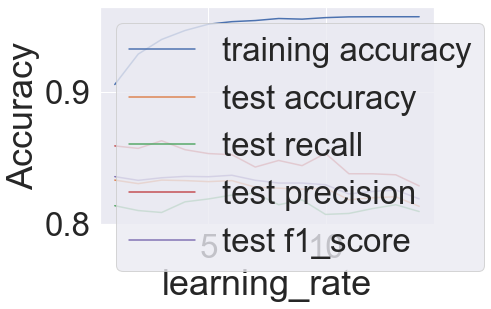

In [114]:
from catboost import CatBoostClassifier
model_catboss = CatBoostClassifier(learning_rate = 0.6, depth = 8, rsm = 1)

model_catboss.fit(X_train, Y_train)
#predicting the target value from the model for the samples
y_train_cat = model_catboss.predict(X_train)
y_test_cat = model_catboss.predict(X_test)

show_result('CatBoost Classifier', y_train_cat, y_test_cat)

# training_accuracy = []
# test_accuracy = []
# # try learning_rate from 0.1 to 0.9
# depth = range(1,10)
# for n in depth:
#     forest_test =  CatBoostClassifier(learning_rate = n*0.1)

#     forest_test.fit(X_train, y_train)
#     # record training set accuracy
#     training_accuracy.append(forest_test.score(X_train, y_train))
#     # record generalization accuracy
#     test_accuracy.append(forest_test.score(X_test, y_test))

re_training(CatBoostClassifier, 'learning_rate', 1, 15, 0.1)

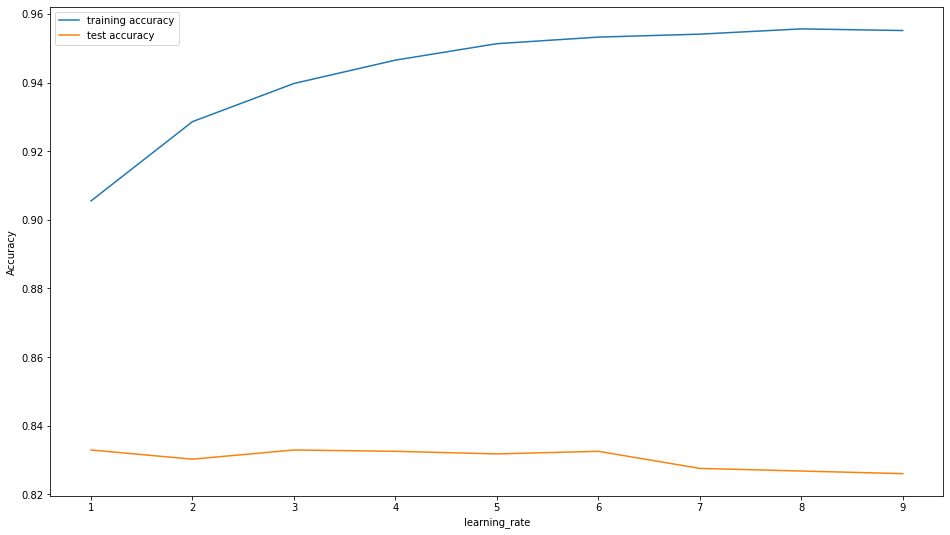

In [193]:
#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

# **Deep Learning**

# **ANN**

In [182]:
# Import the necessary libraries for ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Create a Sequential Neural Network model 
model = Sequential()
# Create an Input and a Hidden Layer
model.add(Dense(units=50,activation="relu",kernel_initializer="he_uniform"))
# Create an Output Layer
model.add(Dense(units=1,activation="sigmoid"))
# Now, my model is ready to compile
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,batch_size=64,epochs=100)

In [ ]:
model.summary()

In [ ]:
# Predict the X_test results
y_pred = model.predict(X_test)

In [ ]:
y_pred_label = []
for i in range(0, len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred_label.append(1)
  else:
    y_pred_label.append(0)

In [ ]:
print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
#Accuracy
print("1. Accuracy:",metrics.accuracy_score(y_pred_label,y_test))
# confusion_matrix
print('2. confusion_matrix:')
print(confusion_matrix(y_pred_label,y_test))
# recall_score
print('3. recall_score: ', recall_score(y_pred_label,y_test))
# precision_score
print('4. precision_score: ', precision_score(y_pred_label,y_test))
# f1_score
print('5. f1_score: ', f1_score(y_pred_label,y_test))

# **LSTM**

In [ ]:
# Import the necessary libraries for ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [ ]:
regressor.summary()

In [ ]:
# Predict the X_test results
y_pred = regressor.predict(X_test)

In [ ]:
y_pred_label = []
for i in range(0, len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred_label.append(1)
  else:
    y_pred_label.append(0)

In [ ]:
print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
#Accuracy
print("1. Accuracy:",metrics.accuracy_score(y_pred_label,y_test))
# confusion_matrix
print('2. confusion_matrix:')
print(confusion_matrix(y_pred_label,y_test))
# recall_score
print('3. recall_score: ', recall_score(y_pred_label,y_test))
# precision_score
print('4. precision_score: ', precision_score(y_pred_label,y_test))
# f1_score
print('5. f1_score: ', f1_score(y_pred_label,y_test))

# ***Kết thúc!***